## TODO LIST

## Organzing Data into Dataframes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from xgboost import XGBClassifier

In [2]:
path =  '/Users/jonathanpeck/desktop/UN_csv/'
enc = "ISO-8859-1"
gdp_df_1 = pd.read_csv(path+ 'GDP_per_capita.csv', encoding = enc)
health_spend_df_1 = pd.read_csv(path+ 'health_spending.csv', encoding = enc)
gva_df_1 = pd.read_csv(path+ 'GVA_econ.csv', encoding = enc)
land_df_1 = pd.read_csv(path+ 'land_info.csv', encoding = enc)
c02_df_1 = pd.read_csv(path+ 'c02_emissions.csv', encoding = enc)
migrant_df_1 = pd.read_csv(path+ 'migrant_refugee.csv', encoding = enc)
energy_df_1 = pd.read_csv(path+ 'energy_info.csv', encoding = enc)
pop_df_1 = pd.read_csv(path+ 'pop_data.csv', encoding = enc)
fert_df_1 = pd.read_csv(path+ 'fertility_mortality.csv', encoding = enc)
pop_rate_df_1 = pd.read_csv(path+ 'pop_growth_rate.csv', encoding = enc)
# health_prof_df_1 = pd.read_csv(path+ 'health_professionals.csv', encoding = enc)
# water_df_1 = pd.read_csv(path+ 'water_data.csv', encoding = enc)
hdi_df_1 = pd.read_csv(path+ 'HDI.csv', encoding = enc)



In [3]:
df_1_list = [gdp_df_1,
            health_spend_df_1,
            gva_df_1,
            land_df_1,
            c02_df_1,
            migrant_df_1,
            energy_df_1,
            pop_df_1,
            fert_df_1,
            pop_rate_df_1]
#             ,health_prof_df_1,
#             water_df_1]
csv_list = ['GDP_per_capita.csv',
            'health_spending.csv',
            'GVA_econ.csv',
            'land_info.csv',
            'c02_emissions.csv',
            'migrant_refugee.csv',
            'energy_info.csv',
            'pop_data.csv',
            'fertility_mortality.csv',
            'pop_growth_rate.csv']
#             ,'health_professionals.csv',
#             'water_data.csv']

In [4]:
def df_titles(a_list):
    col2_list = []
    for i in a_list:
        col2_list.append(i.columns[1])
    return col2_list
    
    
def column_organizer(a_list): #takes a list of UN dataframes and names columns properly
    df_list = []
    for df in a_list:
        df.columns = df.iloc[0]
        df.drop(df.index[0], inplace=True)
        df_list.append(df)   
    return 

def column_retype(a_list): #takes in a list of dataframes and chagnes type of certain columns within each dataframe
    for df in a_list:
        df['Region/Country/Area'] = df['Region/Country/Area'].astype(dtype = 'int64')
        df.Year = pd.to_datetime(df.Year, format = '%Y')
        #df.rename(columns = {'Region/Country/Area' : 'AreaCode'}, inplace = True)
        df.columns = df.columns.fillna(value = 'AreaName') 
        df.drop(columns = ['Footnotes','Source', 'Region/Country/Area'], inplace = True)
        df.Value.replace(to_replace = ',', value= '_', regex = True, inplace = True) 
        df.Value = df.Value.astype(dtype = 'float64')
    return

def pivot_df(df):
    return pd.pivot_table(data = df, columns = 'Series', index = ['AreaName'])

def hdi_to_float(df):
    df[df.columns[-1]].replace(to_replace = '..', value= np.nan, regex = False, inplace = True)
    df[df.columns[-1]] = df[df.columns[-1]].astype(dtype= 'float64', inplace = True)
    return

def classifyer_column(df):
    for i in range(len(df[df.columns[-1]])):
        if df[df.columns[-1]][i] > .80:
            df[df.columns[-1]][i] = 'Developed'
        elif .55 < df[df.columns[-1]][i] < .80:
            df[df.columns[-1]][i] = 'Developing'
        else:
            df[df.columns[-1]][i] = 'Under Developed'
    return df

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = set(labels_2005)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [5]:
titles = df_titles(df_1_list)

In [6]:
column_organizer(df_1_list)

In [7]:
column_retype(df_1_list)

In [8]:
list_of_series = {}
for i,j in zip(titles, df_1_list):
    list_of_series.update({ i : j.Series.unique() })

In [9]:
pop_rate_df_1.drop(columns = ['Capital City', 'Capital City footnote'], inplace = True)

## checkpoint

In [10]:
for i in df_1_list:
    print(i.columns)

Index(['AreaName', 'Year', 'Series', 'Value'], dtype='object', name=0)
Index(['AreaName', 'Year', 'Series', 'Value'], dtype='object', name=0)
Index(['AreaName', 'Year', 'Series', 'Value'], dtype='object', name=0)
Index(['AreaName', 'Year', 'Series', 'Value'], dtype='object', name=0)
Index(['AreaName', 'Year', 'Series', 'Value'], dtype='object', name=0)
Index(['AreaName', 'Year', 'Series', 'Value'], dtype='object', name=0)
Index(['AreaName', 'Year', 'Series', 'Value'], dtype='object', name=0)
Index(['AreaName', 'Year', 'Series', 'Value'], dtype='object', name=0)
Index(['AreaName', 'Year', 'Series', 'Value'], dtype='object', name=0)
Index(['AreaName', 'Year', 'Series', 'Value'], dtype='object', name=0)


In [11]:
for i in df_1_list:
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6639 entries, 1 to 6639
Data columns (total 4 columns):
AreaName    6639 non-null object
Year        6639 non-null datetime64[ns]
Series      6639 non-null object
Value       6639 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 259.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2256 entries, 1 to 2256
Data columns (total 4 columns):
AreaName    2256 non-null object
Year        2256 non-null datetime64[ns]
Series      2256 non-null object
Value       2256 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 88.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4345 entries, 1 to 4345
Data columns (total 4 columns):
AreaName    4345 non-null object
Year        4345 non-null datetime64[ns]
Series      4345 non-null object
Value       4345 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 169.7+ KB
None
<class 'pandas.core.frame.

In [12]:
list_of_series

{'Gross domestic product and gross domestic product per capita': array(['GDP in current prices (millions of US dollars)',
        'GDP per capita (US dollars)',
        'GDP in constant 2010 prices (millions of US dollars)',
        'GDP real rates of growth (percent)'], dtype=object),
 'Expenditure on health': array(['Current health expenditure (% of GDP)',
        'Domestic general government health expenditure (% of total government expenditure)'],
       dtype=object),
 'Gross Value added by kind of economic activity': array(['Agriculture, hunting, forestry and fishing (% of gross value added)',
        'Industry (% of gross value added)',
        'Services (% of gross value added)'], dtype=object),
 'Land': array(['Land area (thousand hectares)', 'Arable land (thousand hectares)',
        'Permanent crops (thousand hectares)',
        'Forest cover (thousand hectares)',
        'Arable land (% of total land area)',
        'Permanent crops (% of total land area)',
        'Forest 

## HDI (Human Development Index) cleaning

In [13]:
hdi_df_1 = hdi_df_1.iloc[:189]

country_list = hdi_df_1.Country

hdi_country_col = hdi_df_1.transpose()

hdi_country_col.drop('Country', axis=0, inplace = True)
hdi_country_col.columns = country_list
hdi_country_col.reset_index(inplace = True)
hdi_country_col.rename(columns = {'index' : 'Year'}, inplace = True)
pd.to_datetime(hdi_country_col.Year[1:30], format = '%Y')


#hdi_country_col.head()

hdi_df_2015 = hdi_country_col.iloc[26:29]

hdi_df_2015.drop('Year', axis =1, inplace = True)

for i in hdi_df_2015.columns:
    hdi_df_2015[i].replace(to_replace = '..', value= np.nan, regex = False, inplace = True) 
    hdi_df_2015[i] = hdi_df_2015[i].astype(dtype = 'float64', inplace = True)
    
##creating dataframes of country with their hdi year for each respective year
hdi_2005 = hdi_country_col[hdi_country_col.Year == '2005'].drop('Year',axis =1).T.reset_index()#to_dict(orient = 'records')
hdi_2005.columns = ['AreaName', '2005_hdi']
hdi_2010 = hdi_country_col[hdi_country_col.Year == '2010'].drop('Year',axis =1).T.reset_index()#to_dict(orient = 'records')
hdi_2010.columns = ['AreaName', '2010_hdi']
hdi_2015 = pd.DataFrame(hdi_df_2015.mean().round(4)).reset_index()
hdi_2015.columns = ['AreaName', '2015_hdi']

hdi_df_2015.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Country  Norway  Switzerland  Australia  Ireland  Germany  Iceland  \
26        0.948        0.942      0.936    0.929    0.933    0.927   
27        0.951        0.943      0.938    0.934    0.934    0.933   
28        0.953        0.944      0.939    0.938    0.936    0.935   

Country  Hong Kong, China (SAR)  Sweden  Singapore  Netherlands  ...  \
26                        0.927   0.929      0.929        0.926  ...   
27                        0.930   0.932      0.930        0.928  ...   
28                        0.933   0.933      0.932        0.931  ...   

Country  Mozambique  Liberia   Mali  Burkina Faso  Sierra Leone  Burundi  \
26            0.432    0.432  0.418         0.412         0.413    0.418   
27            0.435    0.432  0.421         0.420         0.413    0.418   
28            0.437    0.435  0.427         0.423         0.419    0.417   

Country   Chad  South Sudan  Central African Republic  Niger  
26       0.407        0.399                     0.357  0.347  
27       0.405        0.394                     0.362  0.351  
28       0.404        0.388                     0.367  0.354  

[3 rows x 189 columns]

## Selecting features from each DF

In [14]:
for i in list(list_of_series.values()): #values given in each dataframe
    print(i)
    print('\n')

['GDP in current prices (millions of US dollars)'
 'GDP per capita (US dollars)'
 'GDP in constant 2010 prices (millions of US dollars)'
 'GDP real rates of growth (percent)']


['Current health expenditure (% of GDP)'
 'Domestic general government health expenditure (% of total government expenditure)']


['Agriculture, hunting, forestry and fishing (% of gross value added)'
 'Industry (% of gross value added)' 'Services (% of gross value added)']


['Land area (thousand hectares)' 'Arable land (thousand hectares)'
 'Permanent crops (thousand hectares)' 'Forest cover (thousand hectares)'
 'Arable land (% of total land area)'
 'Permanent crops (% of total land area)'
 'Forest cover (% of total land area)'
 'Important sites for terrestrial biodiversity protected (% of total sites protected)']


['Emissions (thousand metric tons of carbon dioxide)'
 'Emissions per capita (metric tons of carbon dioxide)']


['International migrant stock: Both sexes (number)'
 'International migrant stock:

In [15]:
gdp_df = gdp_df_1.loc[gdp_df_1.Series == 'GDP per capita (US dollars)']

health_spend_df = health_spend_df_1.loc[health_spend_df_1.Series == 'Current health expenditure (% of GDP)']

land_df = land_df_1.loc[land_df_1.Series.isin(['Arable land (% of total land area)', 
 'Permanent crops (% of total land area)', 
 'Forest cover (% of total land area)', 
 'Important sites for terrestrial biodiversity protected (% of total sites protected)'])]

c02_df = c02_df_1.loc[c02_df_1.Series.isin(['Emissions (thousand metric tons of carbon dioxide)', 
                                   'Emissions per capita (metric tons of carbon dioxide)'])]

migrant_df = migrant_df_1.loc[migrant_df_1.Series == 'International migrant stock: Both sexes (% total population)']

energy_df = energy_df_1.loc[energy_df_1.Series =='Supply per capita (gigajoules)']

pop_df = pop_df_1.loc[pop_df_1.Series.isin(['Population mid-year estimates (millions)',
                      'Sex ratio (males per 100 females)',
                      'Population density'])]

life_exp_df = fert_df_1.loc[fert_df_1.Series == 'Life expectancy at birth for both sexes (years)']

pop_rate_df = pop_rate_df_1.loc[pop_rate_df_1.Series.isin(['Urban population (percent)',
                           'Capital city population (as a percentage of total population)'])]

# health_prof_df = health_prof_df_1.loc[health_prof_df_1.Series.isin(['Health personnel: Physicians (per 1000 population)',
#  'Health personnel: Pharmacists (per 1000 population)',
#  'Health personnel: Nurses and midwives personnel (per 1000 population)',
#  'Health personnel: Dentists (per 1000 population)'])]

# water_df = water_df_1.loc[water_df_1.Series.isin(['Safely managed drinking water sources, total (Proportion of population with access)',
#  'Safely managed sanitation facilities, total (Proportion of population with access)'])]

df_list = [gdp_df,
           health_spend_df,
           land_df,
           c02_df,
           migrant_df,
           energy_df,
           pop_df,
           life_exp_df,
           pop_rate_df]
#             ,health_prof_df,
#            water_df]

## 2005 df's

In [16]:
gdp_2005 = gdp_df.loc[gdp_df.Year == '2005']

health_spend_2005 = health_spend_df.loc[health_spend_df.Year == '2005']

land_2005 = land_df.loc[land_df.Year == '2005']

c02_2005 = c02_df.loc[c02_df.Year == '2005']

migrant_2005 = migrant_df.loc[migrant_df.Year == '2005']

energy_2005 = energy_df.loc[energy_df.Year == '2005']

pop_2005 = pop_df.loc[pop_df.Year == '2005']

life_exp_2005 = life_exp_df.loc[life_exp_df.Year == '2005']

pop_rate_2005 =  pop_rate_df.loc[pop_rate_df.Year == '2005']

# health_prof_2005 = health_prof_df.loc[health_prof_df.Year == '2005']

# water_2005 = water_df.loc[water_df.Year == '2005']

df_list_2005 = [gdp_2005,
           health_spend_2005,
           land_2005,
           c02_2005,
           migrant_2005,
           energy_2005,
           pop_2005,
           life_exp_2005,
           pop_rate_2005]
#                 ,health_prof_2005,
#            water_2005]

## 2010 df's

In [17]:
gdp_2010 = gdp_df.loc[gdp_df.Year == '2010']

health_spend_2010 = health_spend_df.loc[health_spend_df.Year == '2010']

land_2010 = land_df.loc[land_df.Year == '2010']

c02_2010 = c02_df.loc[c02_df.Year == '2010']

migrant_2010 = migrant_df.loc[migrant_df.Year == '2010']

energy_2010 = energy_df.loc[energy_df.Year == '2010']

pop_2010 = pop_df.loc[pop_df.Year == '2010']

life_exp_2010 = life_exp_df.loc[life_exp_df.Year == '2010']

pop_rate_2010 =  pop_rate_df.loc[pop_rate_df.Year == '2010']

# health_prof_2010 = health_prof_df.loc[health_prof_df.Year == '2010']

# water_2010 = water_df.loc[water_df.Year == '2010']

df_list_2010 = [gdp_2010,
           health_spend_2010,
           land_2010,
           c02_2010,
           migrant_2010,
           energy_2010,
           pop_2010,
           life_exp_2010,
           pop_rate_2010]
# ,health_prof_2010,
#            water_2010]

## 2015 df's

In [18]:
gdp_2015 = gdp_df[gdp_df.Year.isin(['2015', '2016', '2017'])].groupby(['AreaName', 'Series']).mean()

health_spend_2015 = health_spend_df[health_spend_df.Year.isin(['2014','2015','2016'])].groupby(['AreaName', 'Series']).mean()

land_2015 = land_df[land_df.Year.isin(['2016', '2018'])].groupby(['AreaName', 'Series']).mean()

c02_2015 = c02_df[c02_df.Year.isin(['2014'])].groupby(['AreaName', 'Series']).mean()

migrant_2015 = migrant_df[migrant_df.Year.isin(['2015', '2017'])].groupby(['AreaName', 'Series']).mean()

energy_2015 = energy_df[energy_df.Year.isin(['2014' , '2015', '2016'])].groupby(['AreaName', 'Series']).mean()

pop_2015 = pop_df[pop_df.Year.isin(['2014', '2015', '2016', '2017', '2018'])].groupby(['AreaName', 'Series']).mean()

life_exp_2015 = life_exp_df[life_exp_df.Year.isin(['2015'])].groupby(['AreaName', 'Series']).mean()

pop_rate_2015 =  pop_rate_df[pop_rate_df.Year.isin(['2015', '2018'])].groupby(['AreaName', 'Series']).mean()

# health_prof_2015 = health_prof_df[health_prof_df.Year.isin(['2014', '2015', '2016', '2017', '2018'])].groupby(['AreaName', 'Series']).mean()

# water_2015 = water_df[water_df.Year.isin(['2017'])].groupby(['AreaName', 'Series']).mean()

df_list_2015 = [gdp_2015,
           health_spend_2015,
           land_2015,
           c02_2015,
           migrant_2015,
           energy_2015,
           pop_2015,
           life_exp_2015,
           pop_rate_2015]
#            ,health_prof_2015,
#            water_2015]

In [19]:
for i in df_list:
    print(i.Year.unique())
    print('\n')

['1985-01-01T00:00:00.000000000' '1995-01-01T00:00:00.000000000'
 '2005-01-01T00:00:00.000000000' '2010-01-01T00:00:00.000000000'
 '2015-01-01T00:00:00.000000000' '2016-01-01T00:00:00.000000000'
 '2017-01-01T00:00:00.000000000']


['2005-01-01T00:00:00.000000000' '2010-01-01T00:00:00.000000000'
 '2014-01-01T00:00:00.000000000' '2015-01-01T00:00:00.000000000'
 '2016-01-01T00:00:00.000000000' '2000-01-01T00:00:00.000000000']


['2005-01-01T00:00:00.000000000' '2010-01-01T00:00:00.000000000'
 '2016-01-01T00:00:00.000000000' '2018-01-01T00:00:00.000000000']


['1975-01-01T00:00:00.000000000' '1985-01-01T00:00:00.000000000'
 '1995-01-01T00:00:00.000000000' '2005-01-01T00:00:00.000000000'
 '2010-01-01T00:00:00.000000000' '2012-01-01T00:00:00.000000000'
 '2013-01-01T00:00:00.000000000' '2014-01-01T00:00:00.000000000']


['2005-01-01T00:00:00.000000000' '2010-01-01T00:00:00.000000000'
 '2015-01-01T00:00:00.000000000' '2017-01-01T00:00:00.000000000']


['1990-01-01T00:00:00.000000000' '1995-01-

## Adding new csv of Water

In [20]:
new_water = pd.read_csv(path+ 'new_water.csv', encoding = enc)

for i in new_water.columns[4:7]:
    new_water[i].replace(to_replace = '..', value= np.nan, regex = False, inplace = True) 
    new_water[i] = new_water[i].astype(dtype = 'float64', inplace = True)
    
new_water.drop(columns = ['Country Code' , 'Series Code'], inplace = True )

newer_water = new_water.loc[new_water['Series Name']  == 'People using at least basic drinking water services (% of population)']

new_water_2005 = newer_water[['Country Name', '2005 [YR2005]']]
new_water_2010 = newer_water[['Country Name', '2010 [YR2010]']]
new_water_2015 = newer_water[['Country Name', '2015 [YR2015]']]

new_water_2005.columns = ['AreaName', 'People using at least basic drinking water services (% of population)'] 
new_water_2010.columns = ['AreaName', 'People using at least basic drinking water services (% of population)'] 
new_water_2015.columns = ['AreaName', 'People using at least basic drinking water services (% of population)'] 

## Concat and pivot of 2005,2010,2015 DF's

In [21]:
concat_df_2005 = pd.concat(df_list_2005, join = 'inner')
temp_pivot_2005 = pivot_df(concat_df_2005)
pivot_2005 = temp_pivot_2005.Value.reset_index()
temp_df_2005 = pd.merge(pivot_2005, new_water_2005, on = 'AreaName')
df_2005 = pd.merge(temp_df_2005, hdi_2005, on = 'AreaName')
hdi_to_float(df_2005)


concat_df_2010 = pd.concat(df_list_2010, join = 'inner')
temp_pivot_2010 = pivot_df(concat_df_2010)
pivot_2010 = temp_pivot_2010.Value.reset_index()
temp_df_2010 = pd.merge(pivot_2010, new_water_2010, on = 'AreaName')
df_2010 = pd.merge(temp_df_2010, hdi_2010, on = 'AreaName')
hdi_to_float(df_2010)


concat_df_2015 = pd.concat(df_list_2015, join = 'inner')
temp_pivot_2015 = pivot_df(concat_df_2015)
pivot_2015 = temp_pivot_2015.Value.reset_index()
temp_df_2015 = pd.merge(pivot_2015, new_water_2015, on = 'AreaName')
df_2015 = pd.merge(temp_df_2015, hdi_2015, on = 'AreaName')
hdi_to_float(df_2015)


## EDA, 2005

In [22]:
df_2005.describe()

Arable land (% of total land area)  \
count                          158.000000   
mean                            14.713291   
std                             13.414481   
min                              0.000000   
25%                              4.125000   
50%                             11.150000   
75%                             20.725000   
max                             60.800000   

       Capital city population (as a percentage of total population)  \
count                                         126.000000               
mean                                           17.024603               
std                                            14.360416               
min                                             0.300000               
25%                                             7.425000               
50%                                            13.900000               
75%                                            21.650000               
max                                           100.000000               

       Current health expenditure (% of GDP)  \
count                             158.000000   
mean                                6.150092   
std                                 2.922229   
min                                 1.344900   
25%                                 4.117800   
50%                                 5.527150   
75%                                 7.997650   
max                                26.288900   

       Emissions (thousand metric tons of carbon dioxide)  \
count                                       1.570000e+02    
mean                                        1.282862e+05    
std                                         5.133647e+05    
min                                         5.900000e+01    
25%                                         1.742000e+03    
50%                                         1.077000e+04    
75%                                         5.916700e+04    
max                                         5.896958e+06    

       Emissions per capita (metric tons of carbon dioxide)  \
count                                         157.000000      
mean                                            4.994904      
std                                             7.447137      
min                                             0.000000      
25%                                             0.600000      
50%                                             2.200000      
75%                                             7.300000      
max                                            62.100000      

       Forest cover (% of total land area)  GDP per capita (US dollars)  \
count                           158.000000                   160.000000   
mean                             31.134177                 10988.431250   
std                              23.736399                 17653.408475   
min                               0.000000                   150.000000   
25%                              11.050000                  1132.750000   
50%                              28.900000                  3316.000000   
75%                              47.200000                 11217.750000   
max                              98.500000                116095.000000   

       Important sites for terrestrial biodiversity protected (% of total sites protected)  \
count                                         159.000000                                     
mean                                           38.200629                                     
std                                            26.411626                                     
min                                             0.000000                                     
25%                                            16.580000                                     
50%                                            34.990000                                     
75%                                            57.060000           

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1927e860>,
      dtype=object)

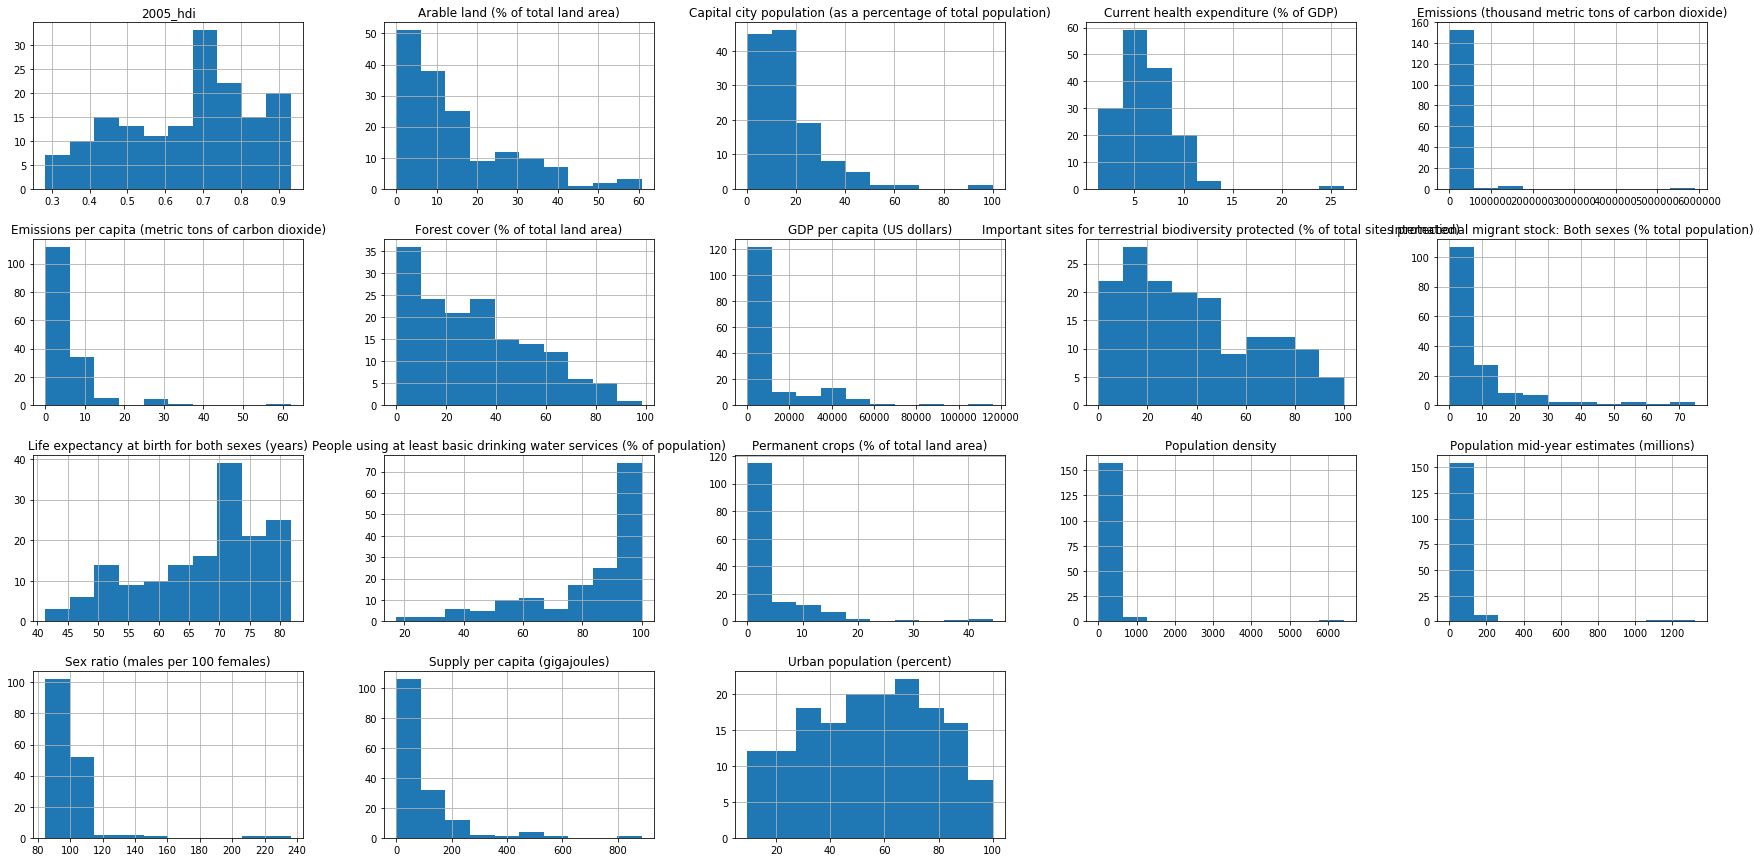

In [23]:
df_2005.hist(figsize=(30, 15), layout = (4,5))

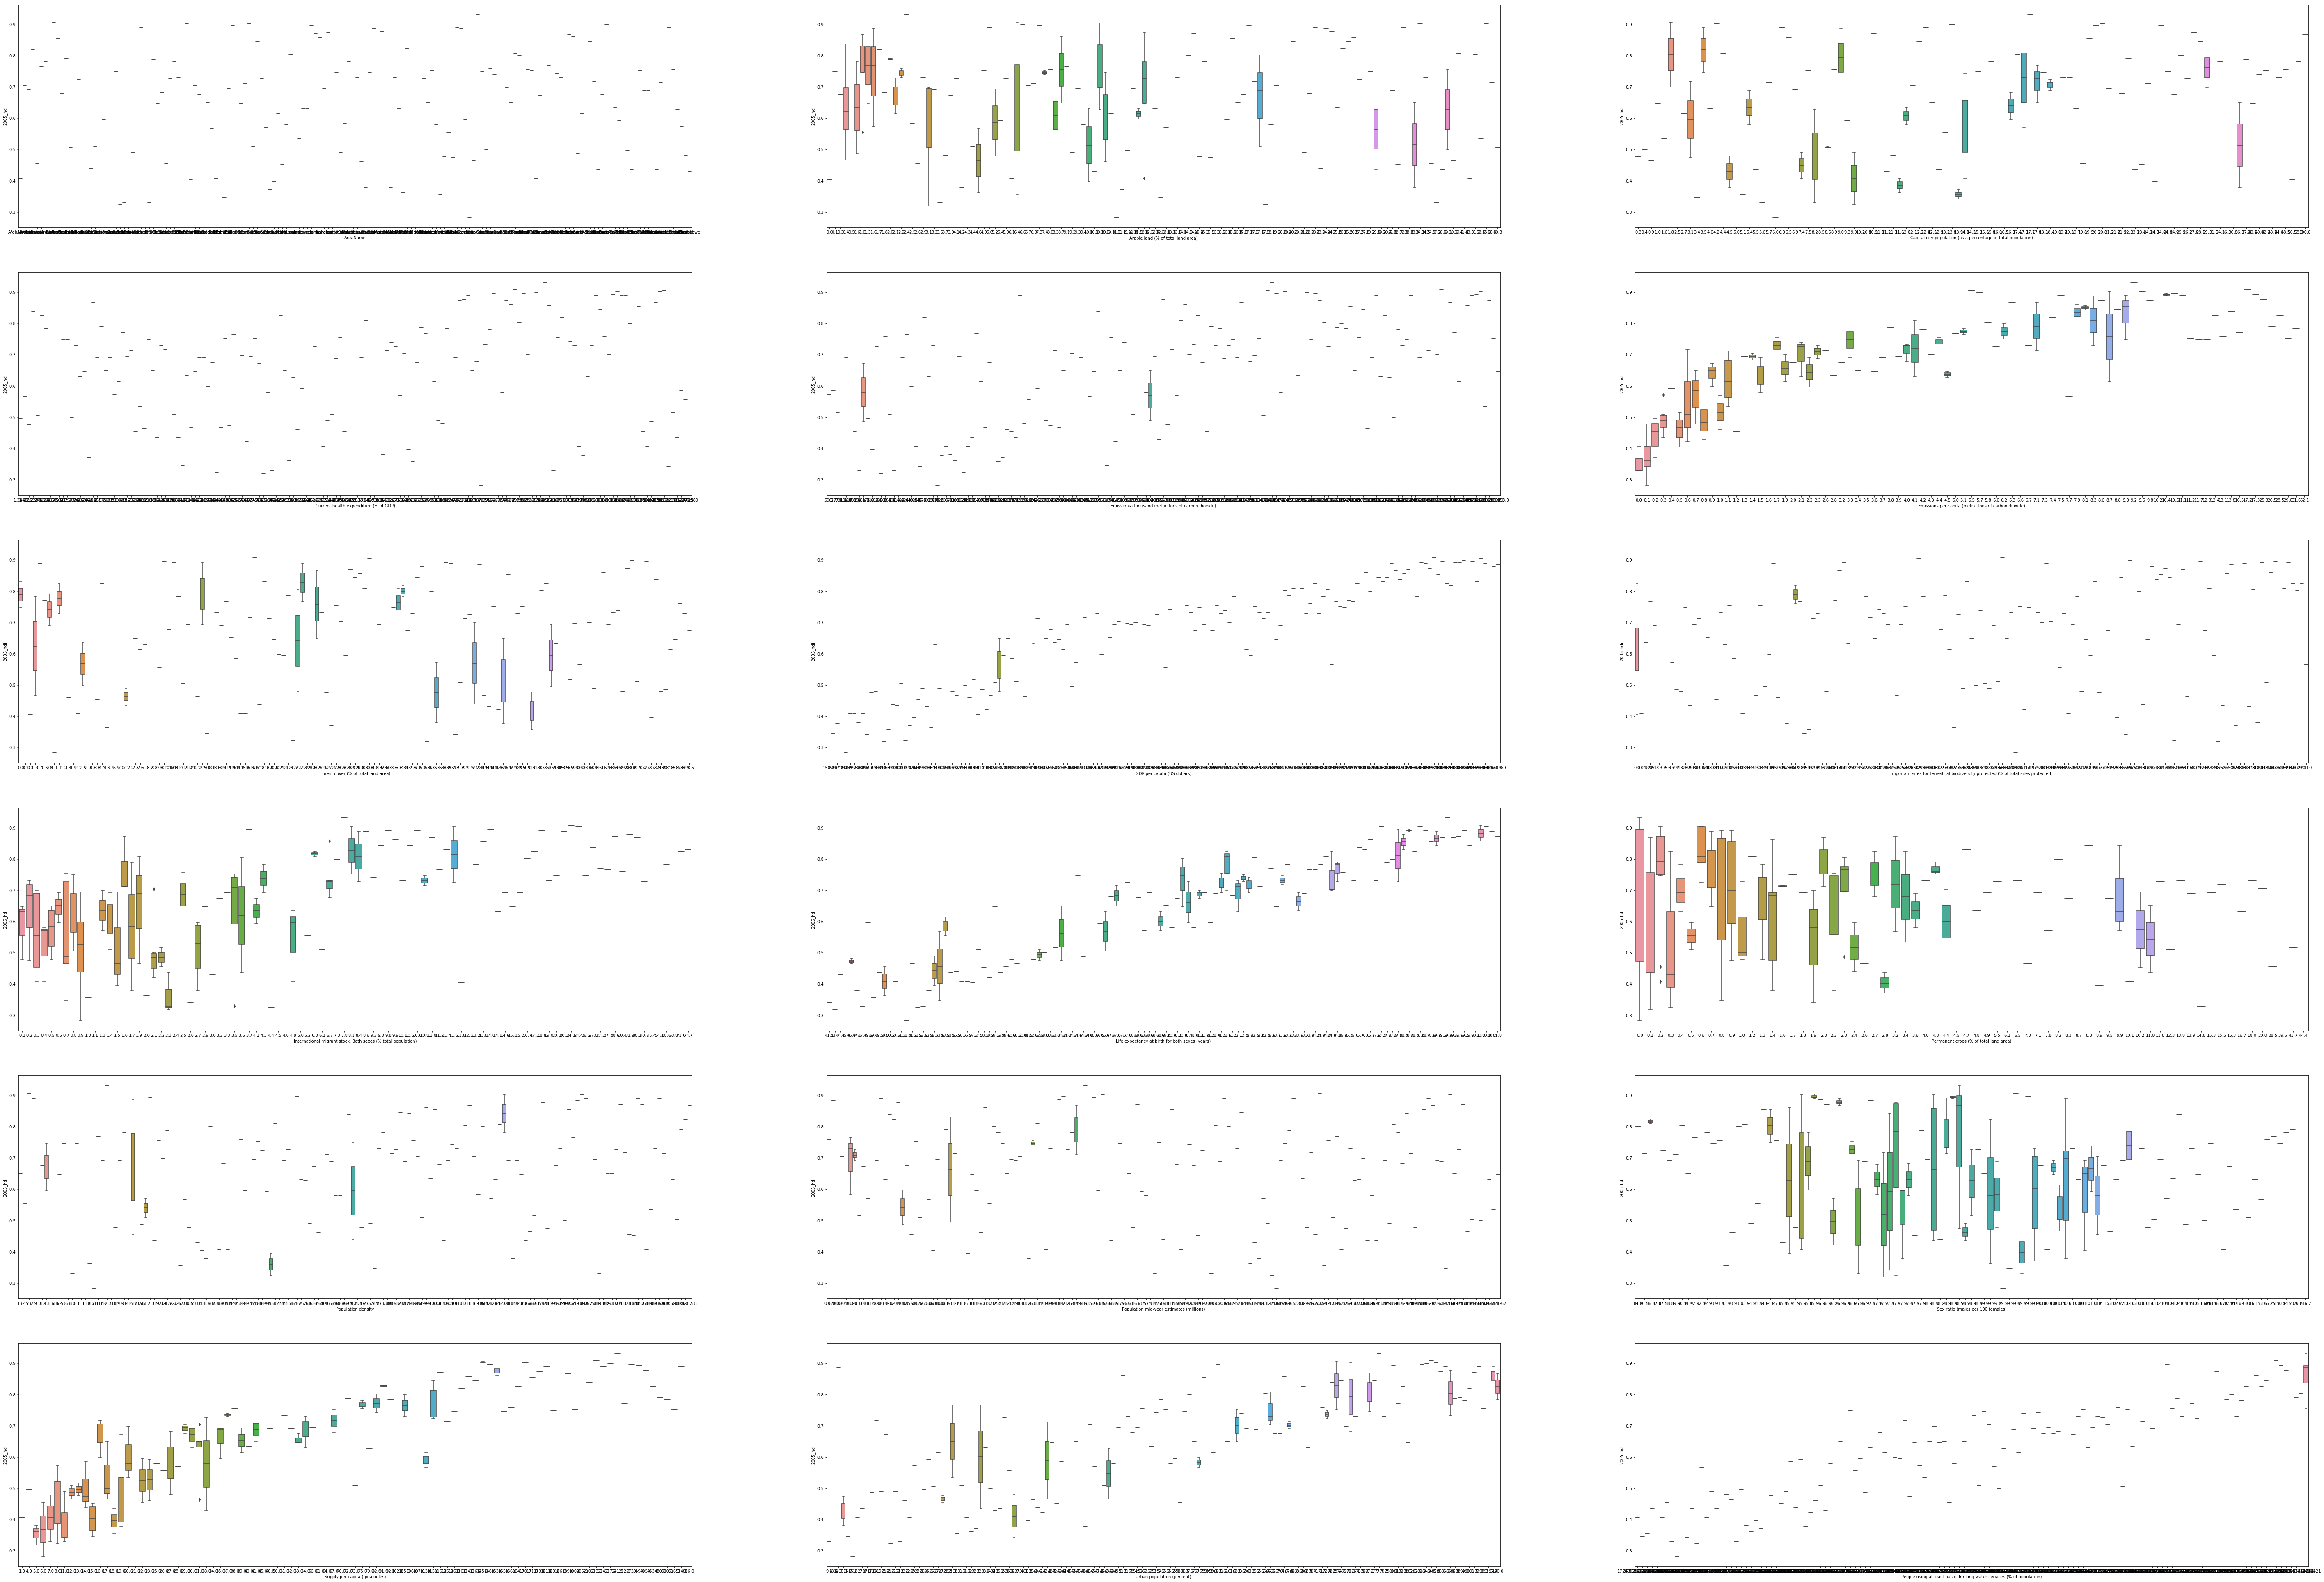

In [24]:
fig, ax = plt.subplots(6, 3, figsize=(100, 70))
for var, subplot in zip(list(df_2005.columns), ax.flatten()):
    sns.boxplot(x=var, y='2005_hdi', data=df_2005, ax=subplot)

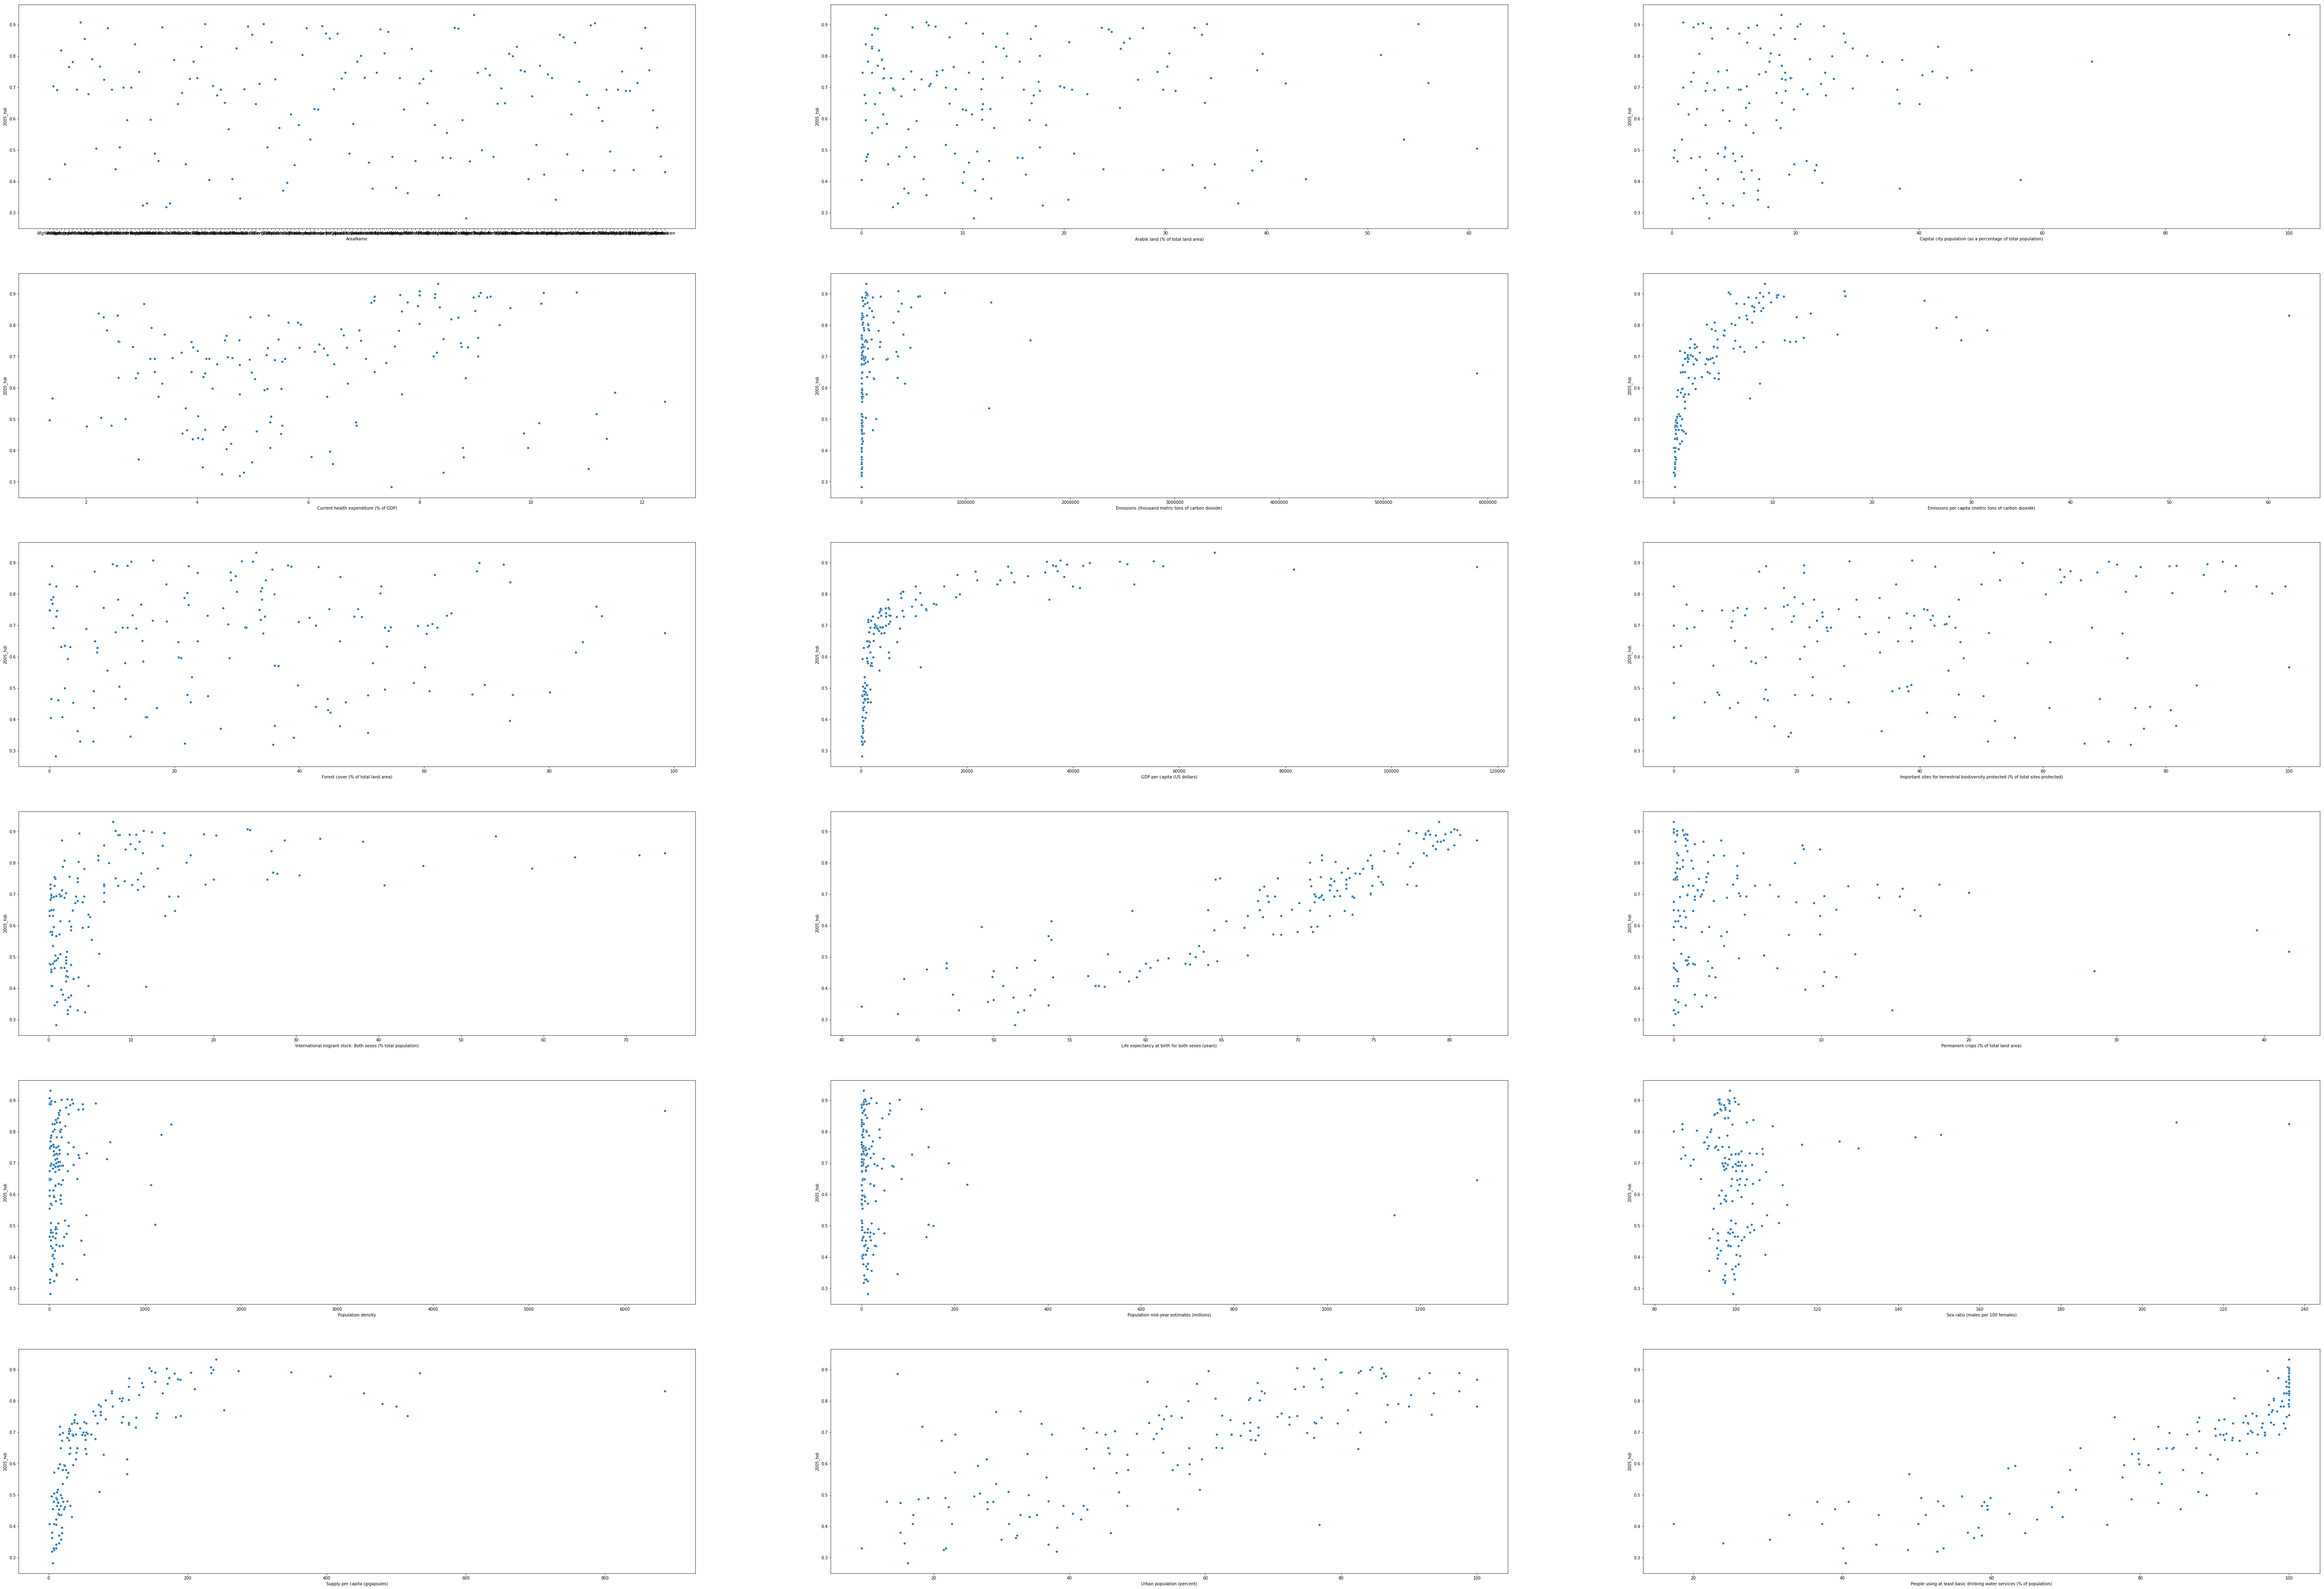

In [25]:
fig, ax = plt.subplots(6, 3, figsize=(100, 70))
for var, subplot in zip(list(df_2005.columns), ax.flatten()):
    sns.scatterplot(x=var, y='2005_hdi', data=df_2005, ax=subplot)

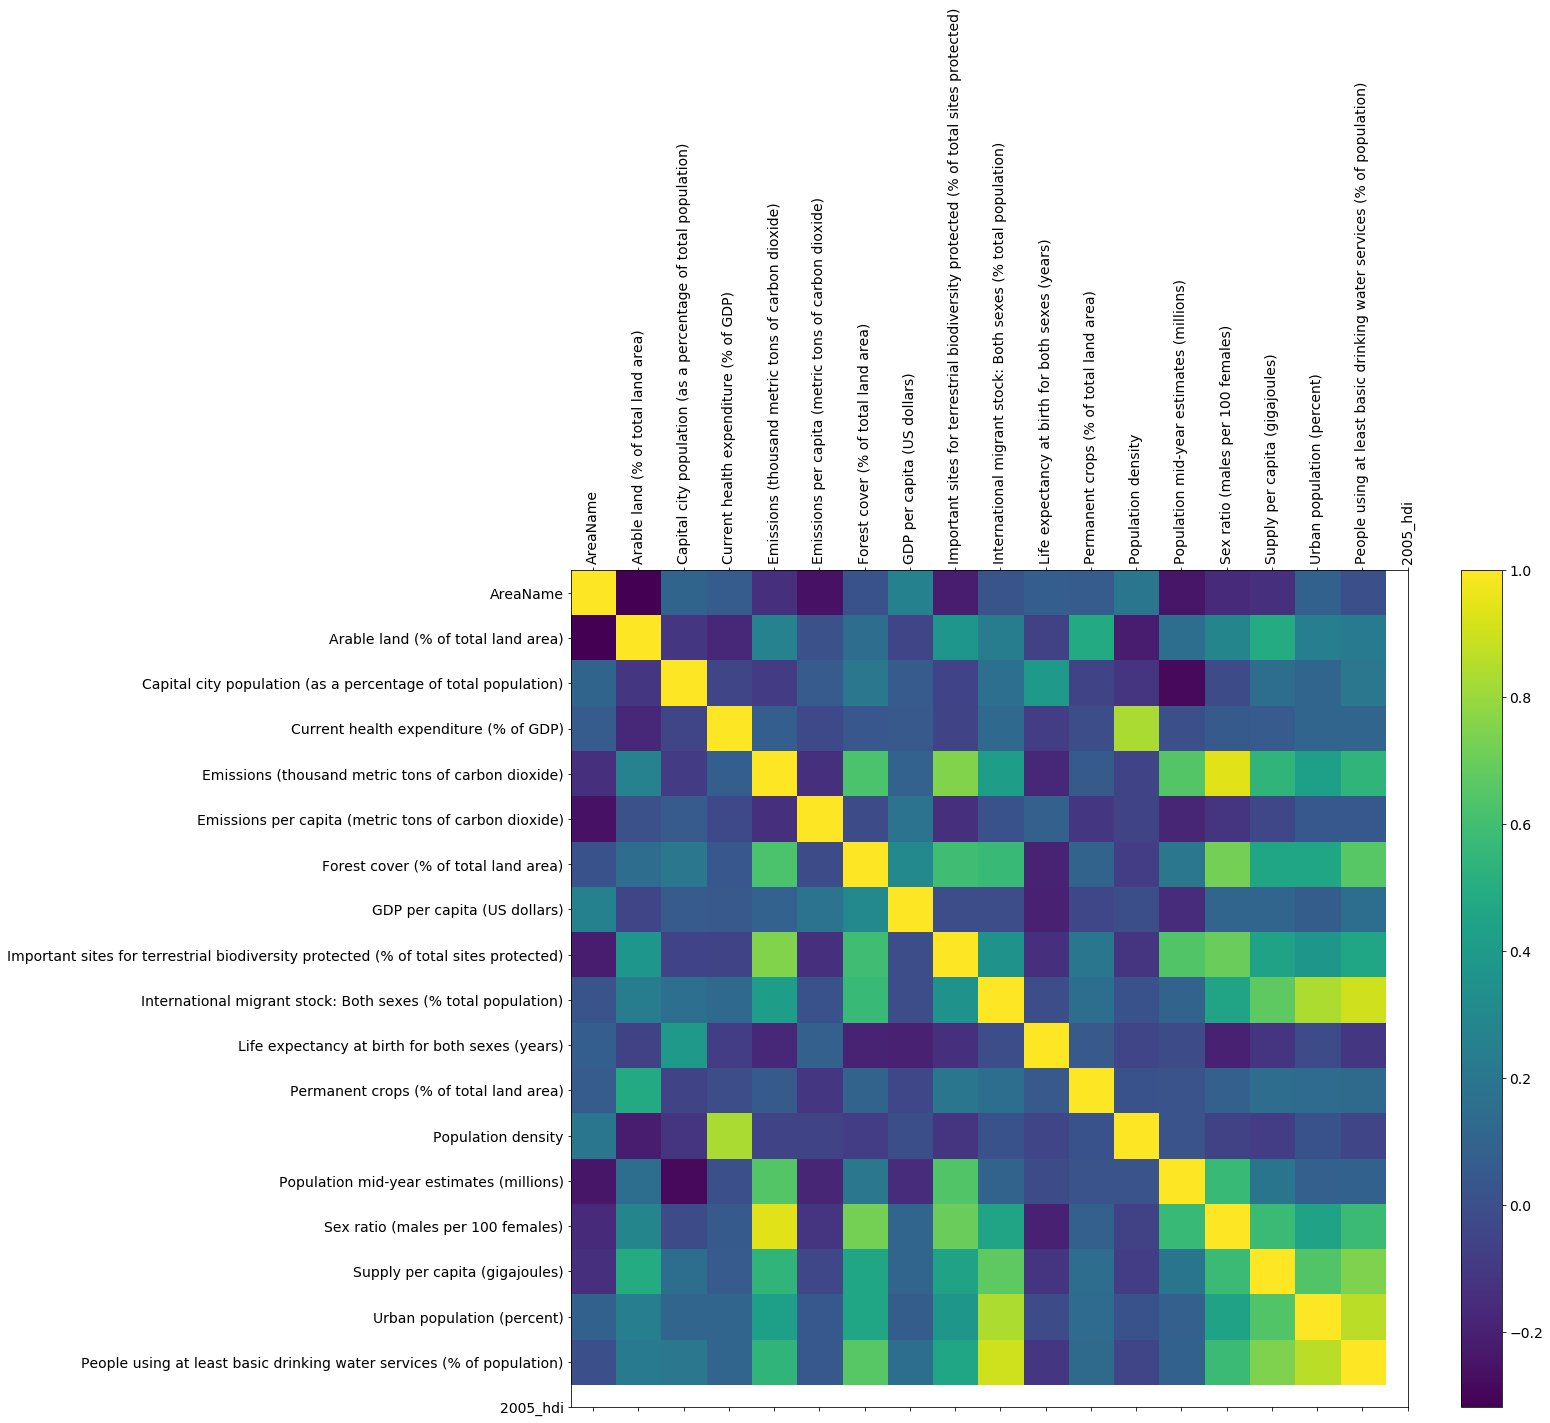

In [79]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_2005.corr(), fignum=f.number)
plt.xticks(range(df_2005.shape[1]), df_2005.columns, fontsize=14, rotation=90)
plt.yticks(range(df_2005.shape[1]), df_2005.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14);
#plt.title('Correlation Matrix', fontsize=16);

## EDA, 2010

In [26]:
df_2010.describe()

Arable land (% of total land area)  \
count                          160.000000   
mean                            14.910625   
std                             13.463842   
min                              0.100000   
25%                              4.250000   
50%                             11.100000   
75%                             22.050000   
max                             59.900000   

       Capital city population (as a percentage of total population)  \
count                                         126.000000               
mean                                           17.193651               
std                                            14.224248               
min                                             0.500000               
25%                                             7.800000               
50%                                            14.300000               
75%                                            22.325000               
max                                           100.000000               

       Current health expenditure (% of GDP)  \
count                             159.000000   
mean                                6.369752   
std                                 2.740516   
min                                 1.426000   
25%                                 4.304950   
50%                                 6.077400   
75%                                 8.505250   
max                                19.301000   

       Emissions (thousand metric tons of carbon dioxide)  \
count                                       1.600000e+02    
mean                                        1.511657e+05    
std                                         7.266096e+05    
min                                         5.500000e+01    
25%                                         2.267000e+03    
50%                                         1.131650e+04    
75%                                         6.415775e+04    
max                                         8.776040e+06    

       Emissions per capita (metric tons of carbon dioxide)  \
count                                         160.000000      
mean                                            4.896250      
std                                             6.469045      
min                                             0.000000      
25%                                             0.600000      
50%                                             2.650000      
75%                                             6.425000      
max                                            41.100000      

       Forest cover (% of total land area)  GDP per capita (US dollars)  \
count                           160.000000                   162.000000   
mean                             31.059375                 13865.722222   
std                              23.454919                 21617.450797   
min                               0.000000                   232.000000   
25%                              11.100000                  1512.750000   
50%                              30.150000                  4857.000000   
75%                              46.750000                 13670.750000   
max                              98.400000                156127.000000   

       Important sites for terrestrial biodiversity protected (% of total sites protected)  \
count                                         159.000000                                     
mean                                           42.507547                                     
std                                            27.019798                                     
min                                             0.000000                                     
25%                                            20.590000                                     
50%                                            38.840000                                     
75%                                            64.815000           

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2e8db710>,
      dtype=object)

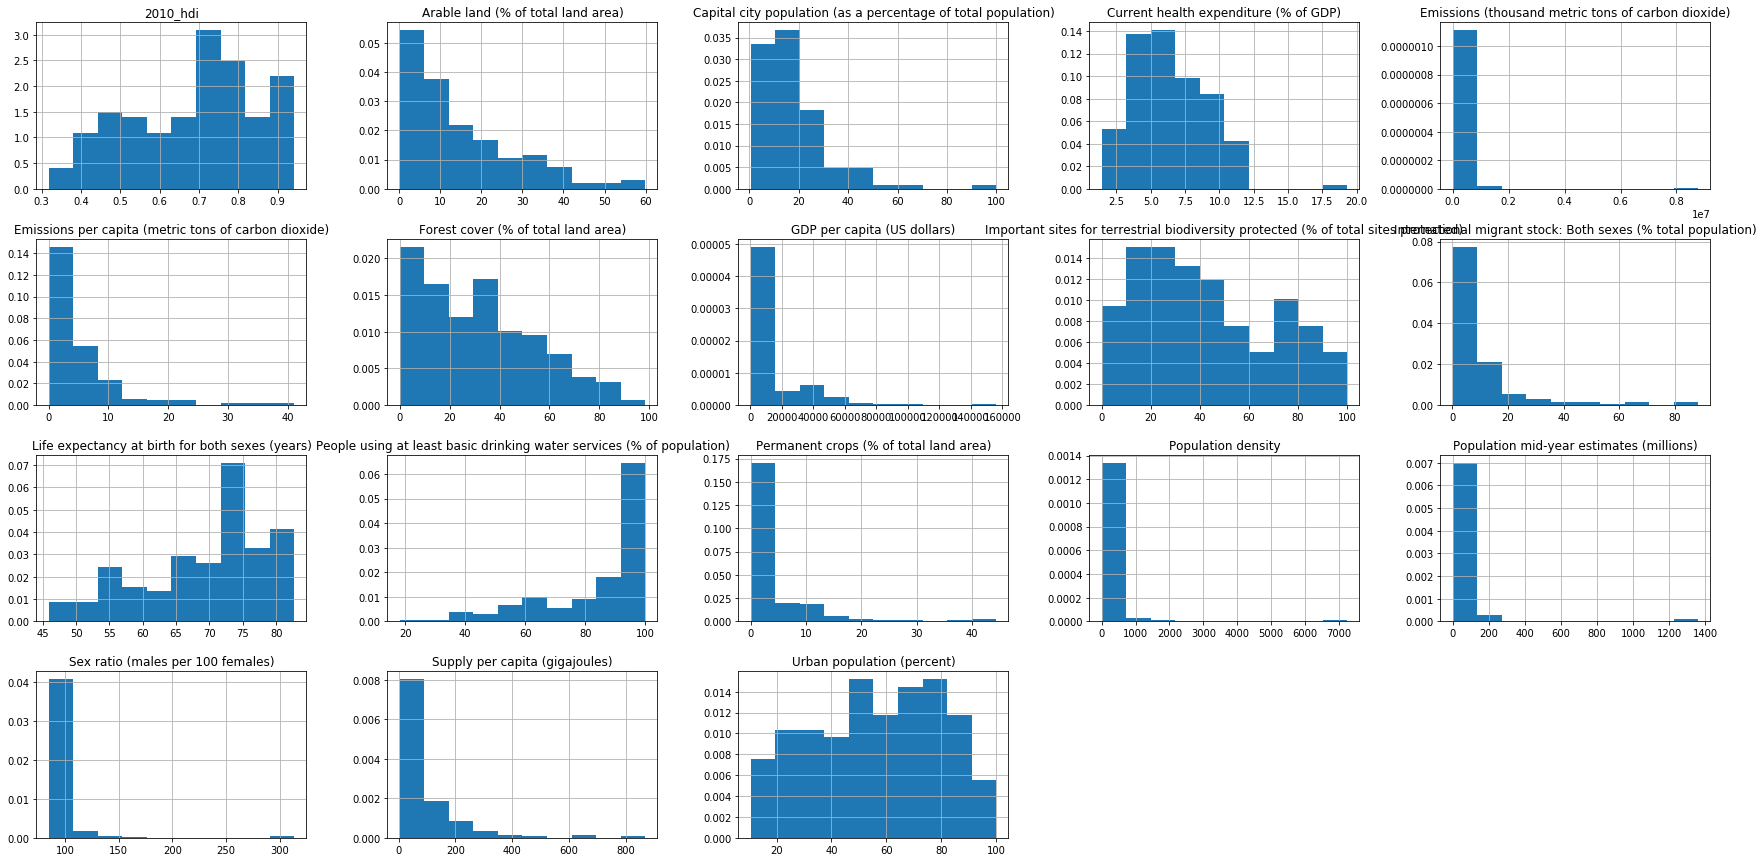

In [27]:
df_2010.hist(figsize=(30, 15), layout = (4,5), density = True)

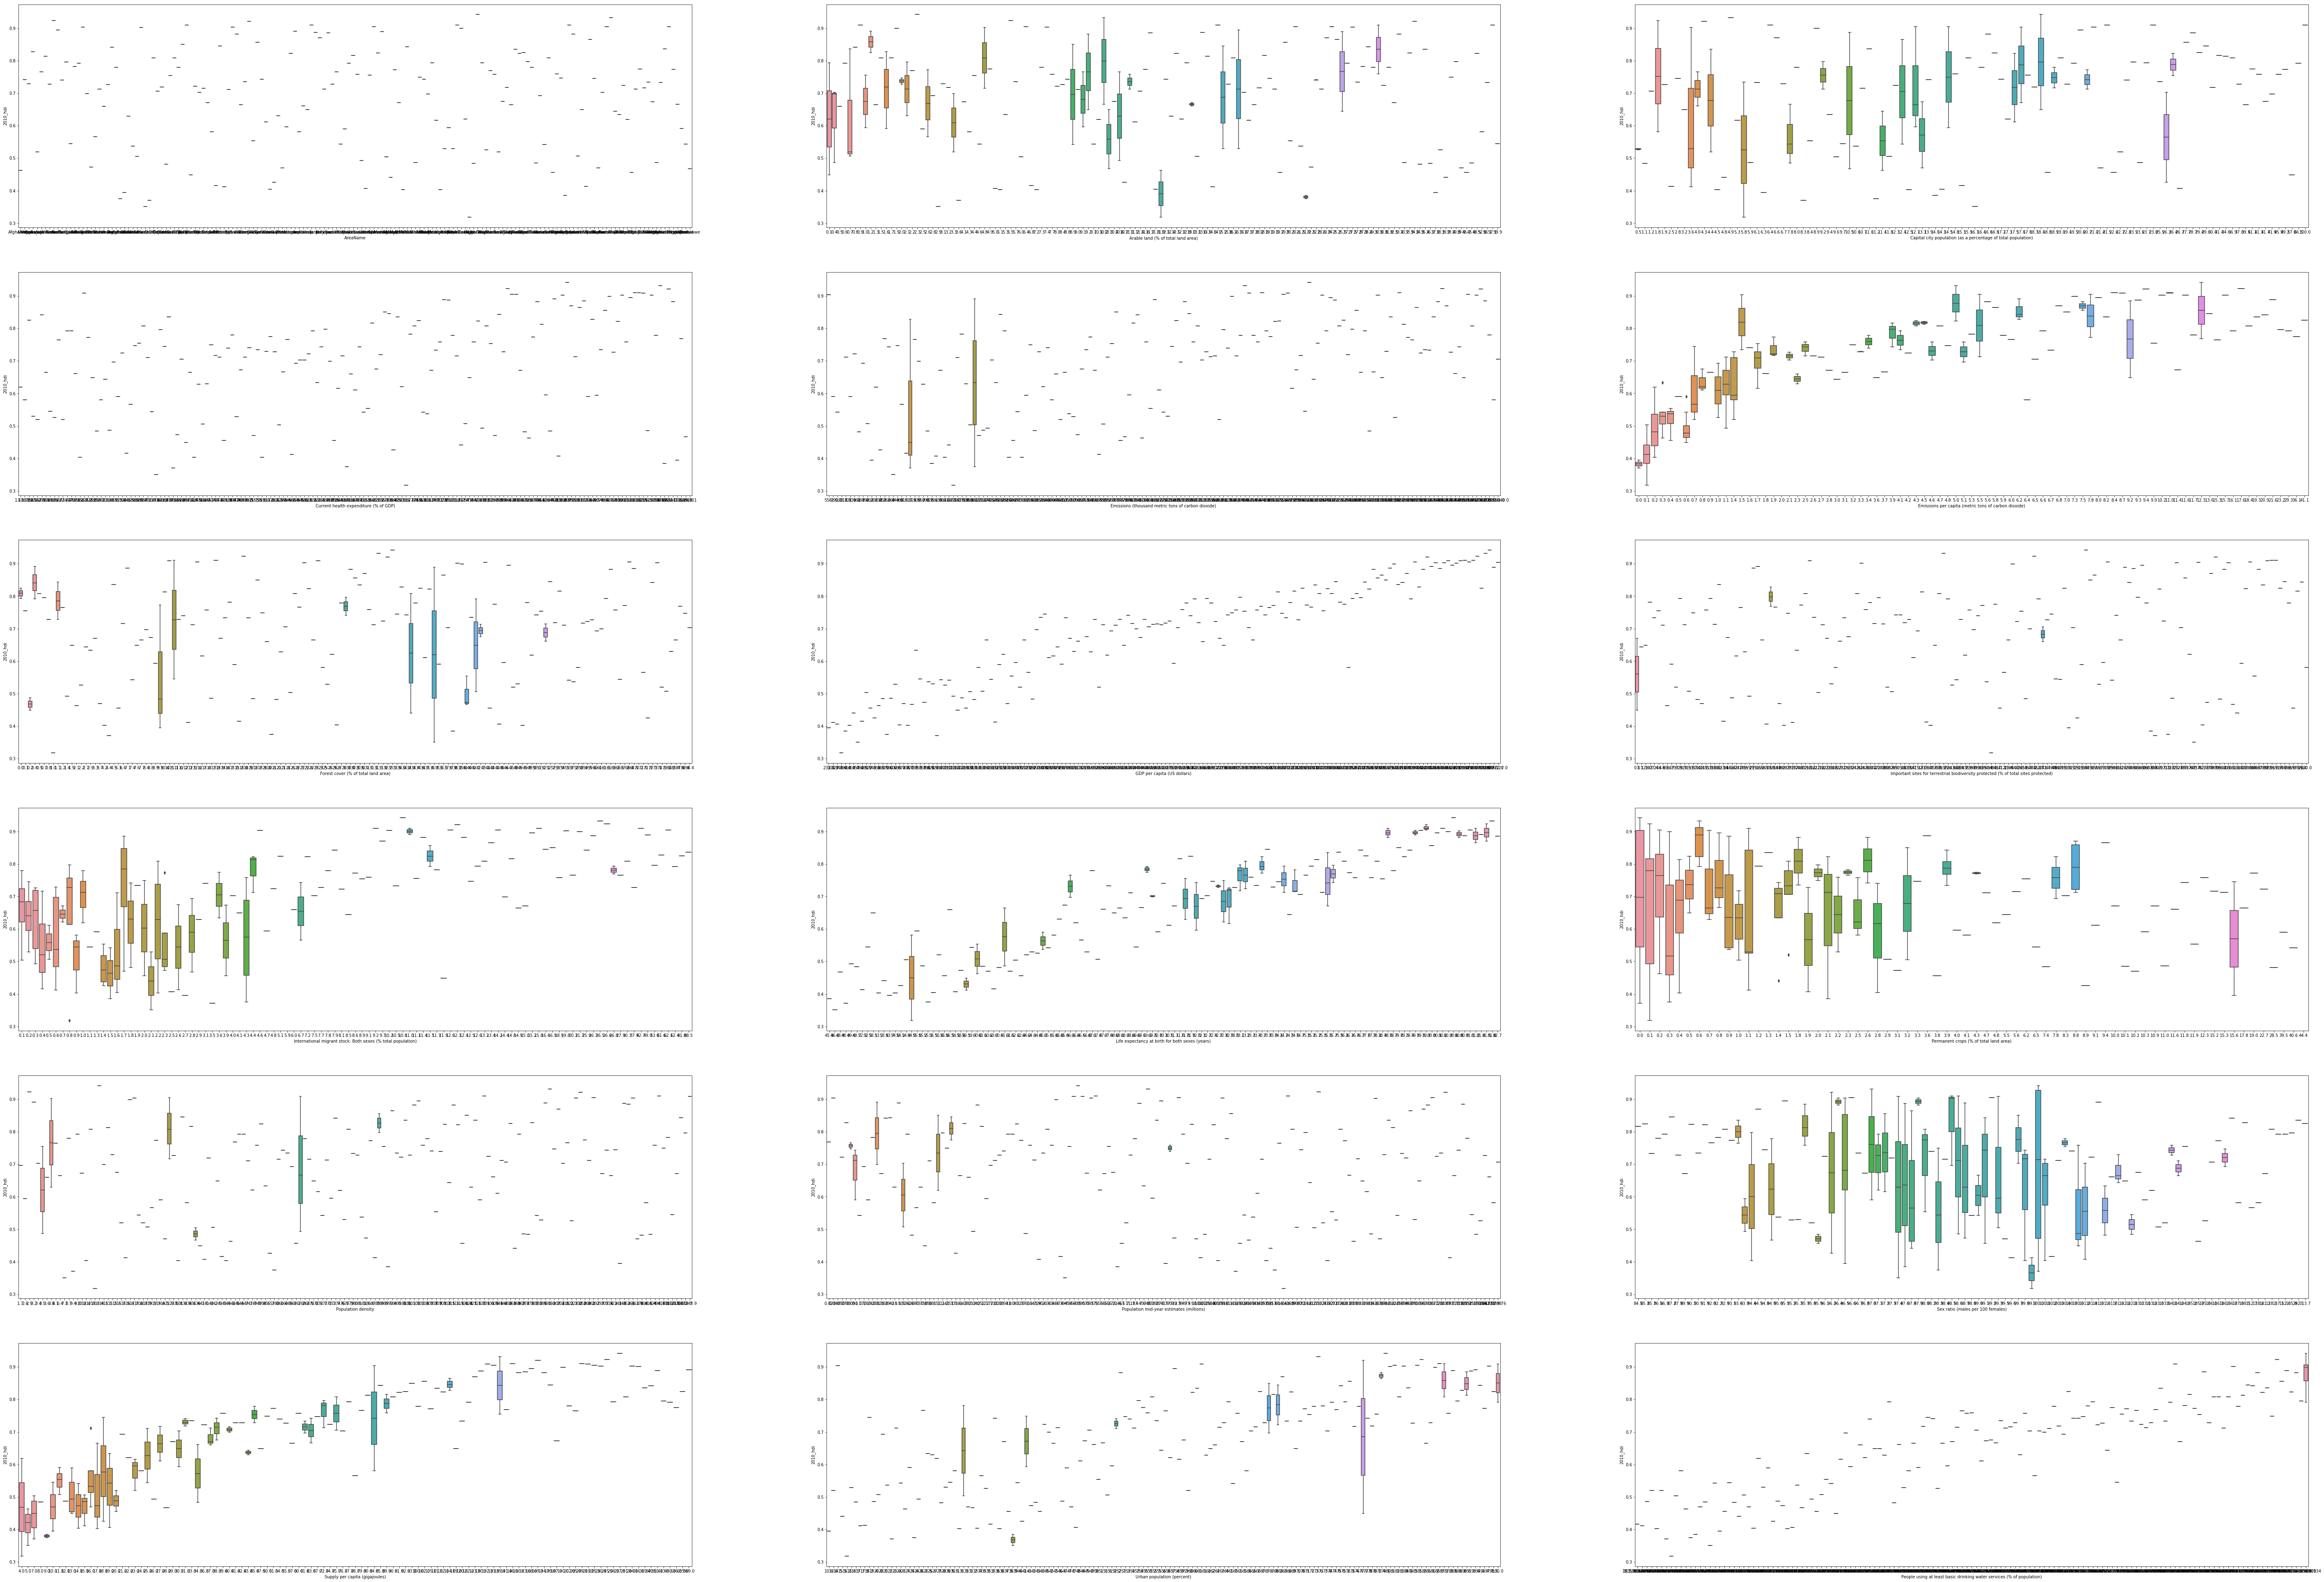

In [28]:
fig, ax = plt.subplots(6, 3, figsize=(100, 70))
for var, subplot in zip(list(df_2010.columns), ax.flatten()):
    sns.boxplot(x=var, y='2010_hdi', data=df_2010, ax=subplot)

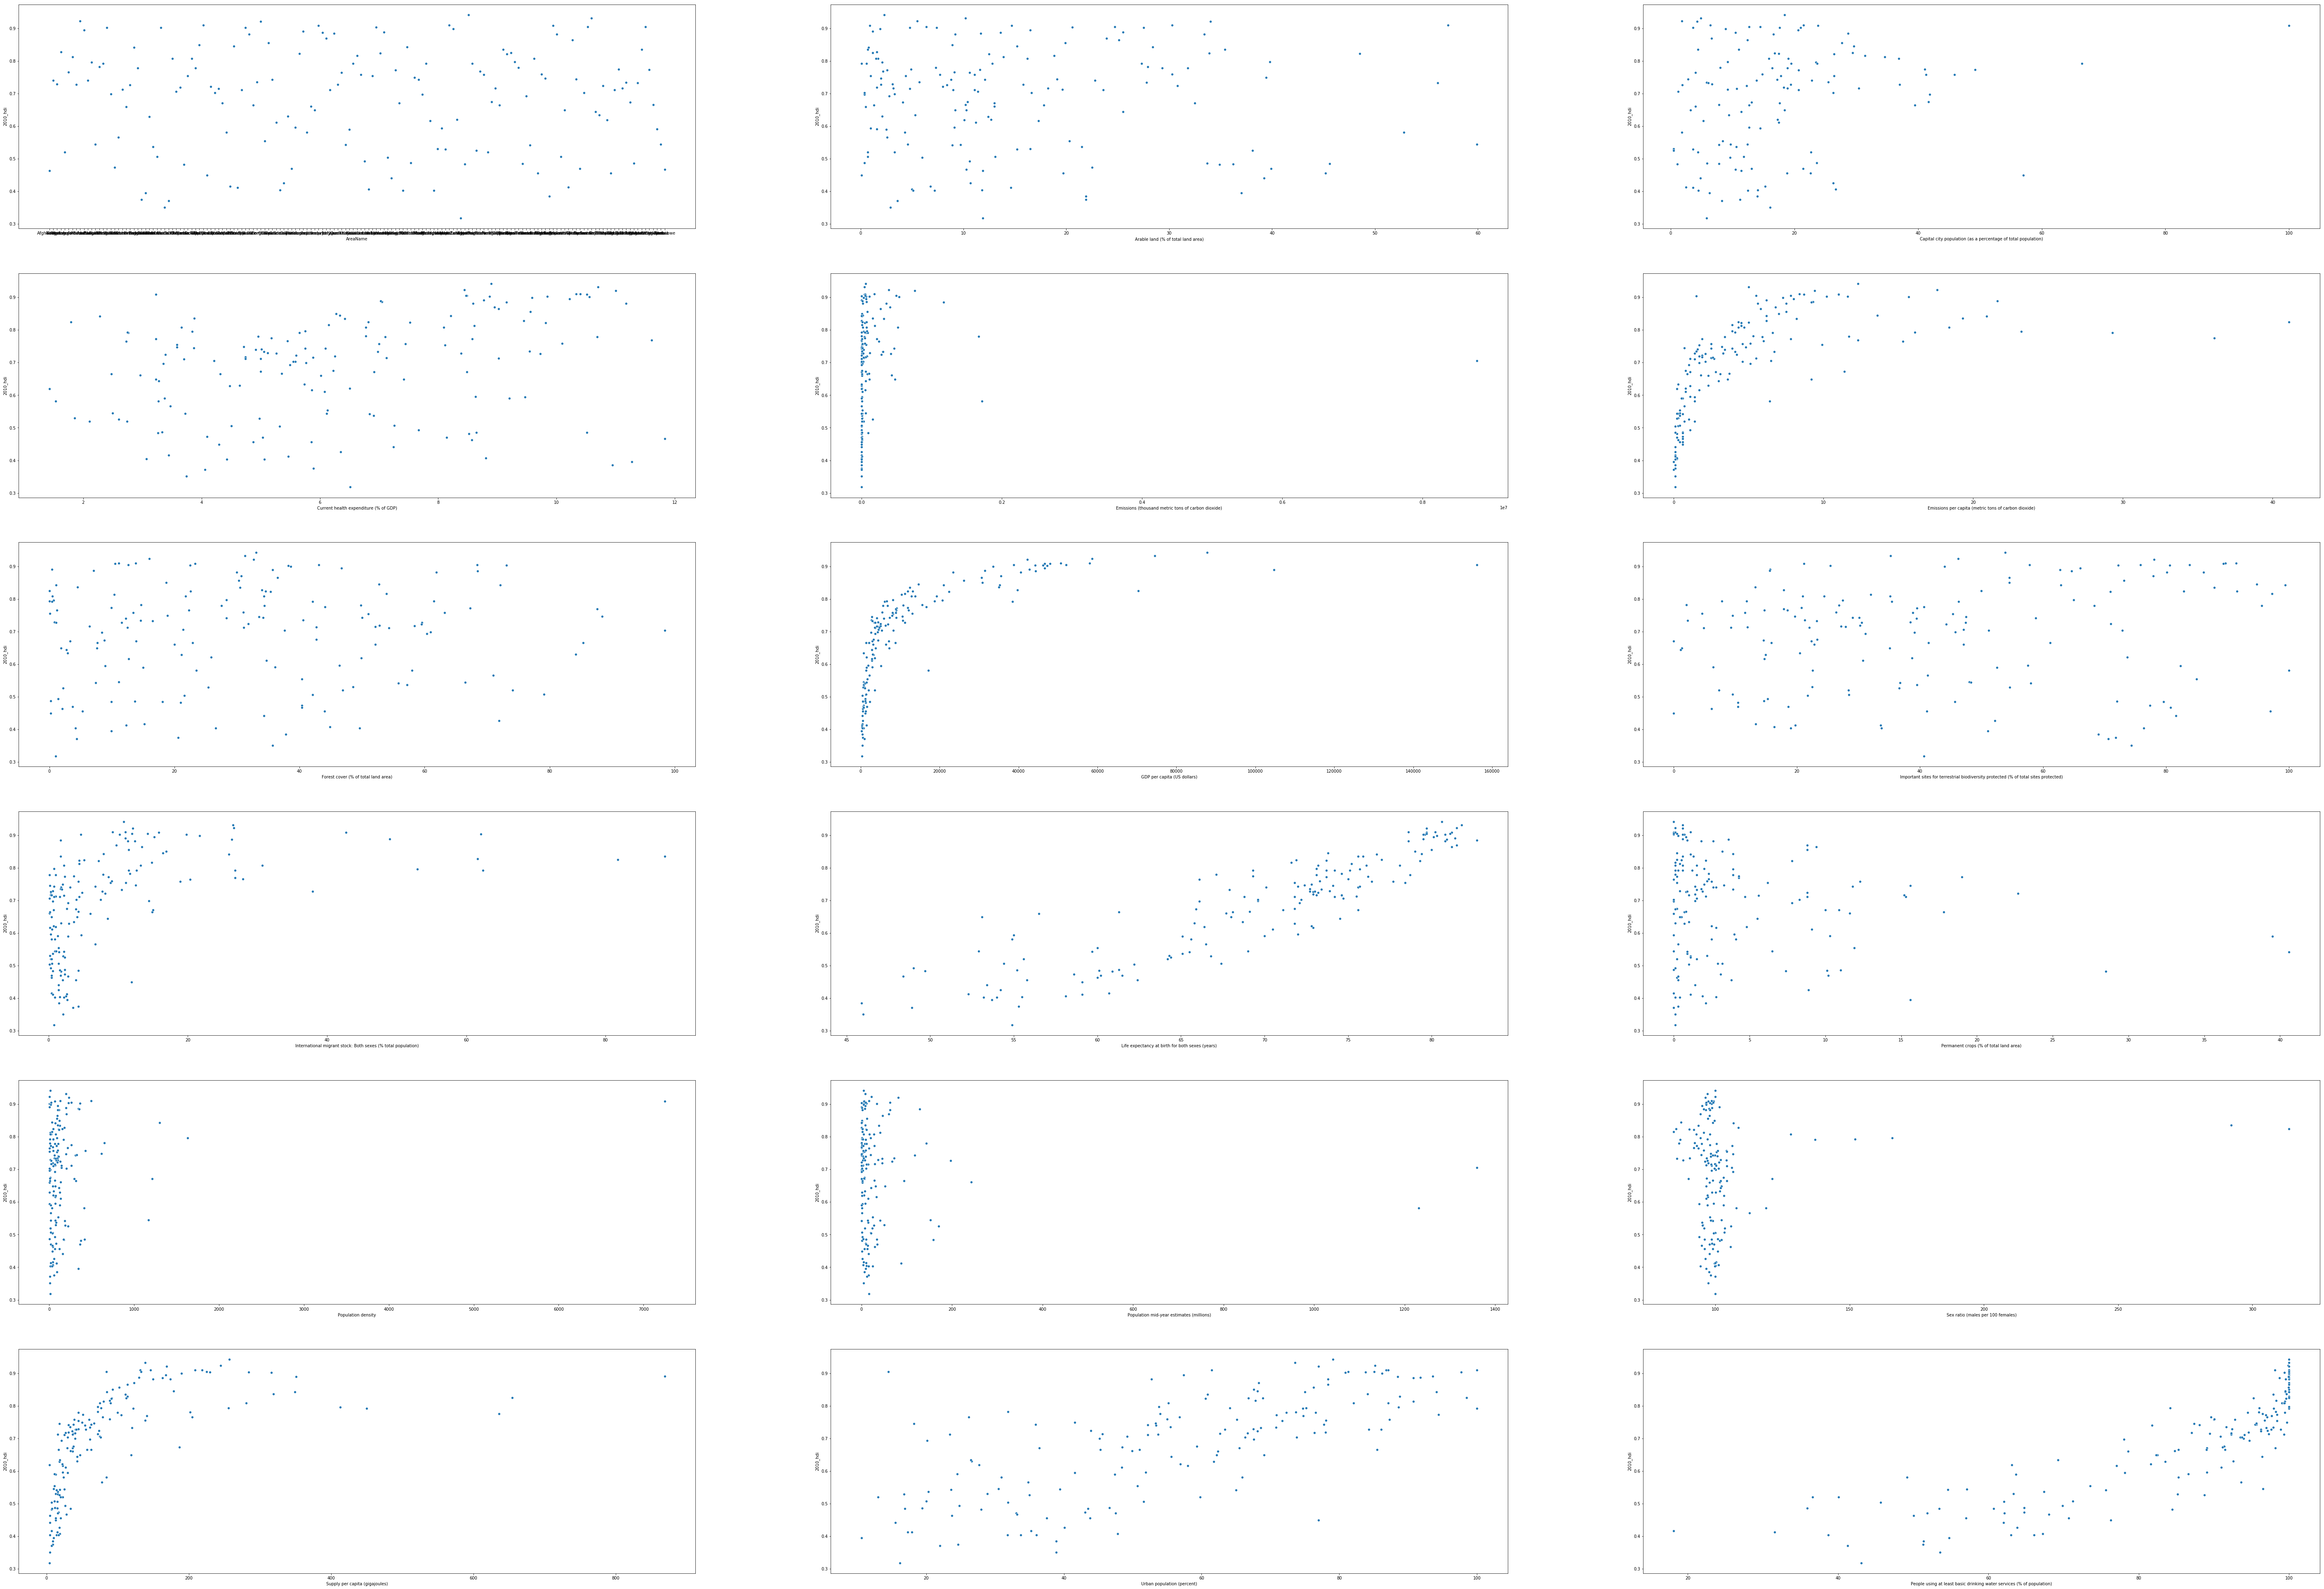

In [29]:
fig, ax = plt.subplots(6, 3, figsize=(100, 70))
for var, subplot in zip(list(df_2005.columns), ax.flatten()):
    sns.scatterplot(x=var, y='2010_hdi', data=df_2010, ax=subplot)

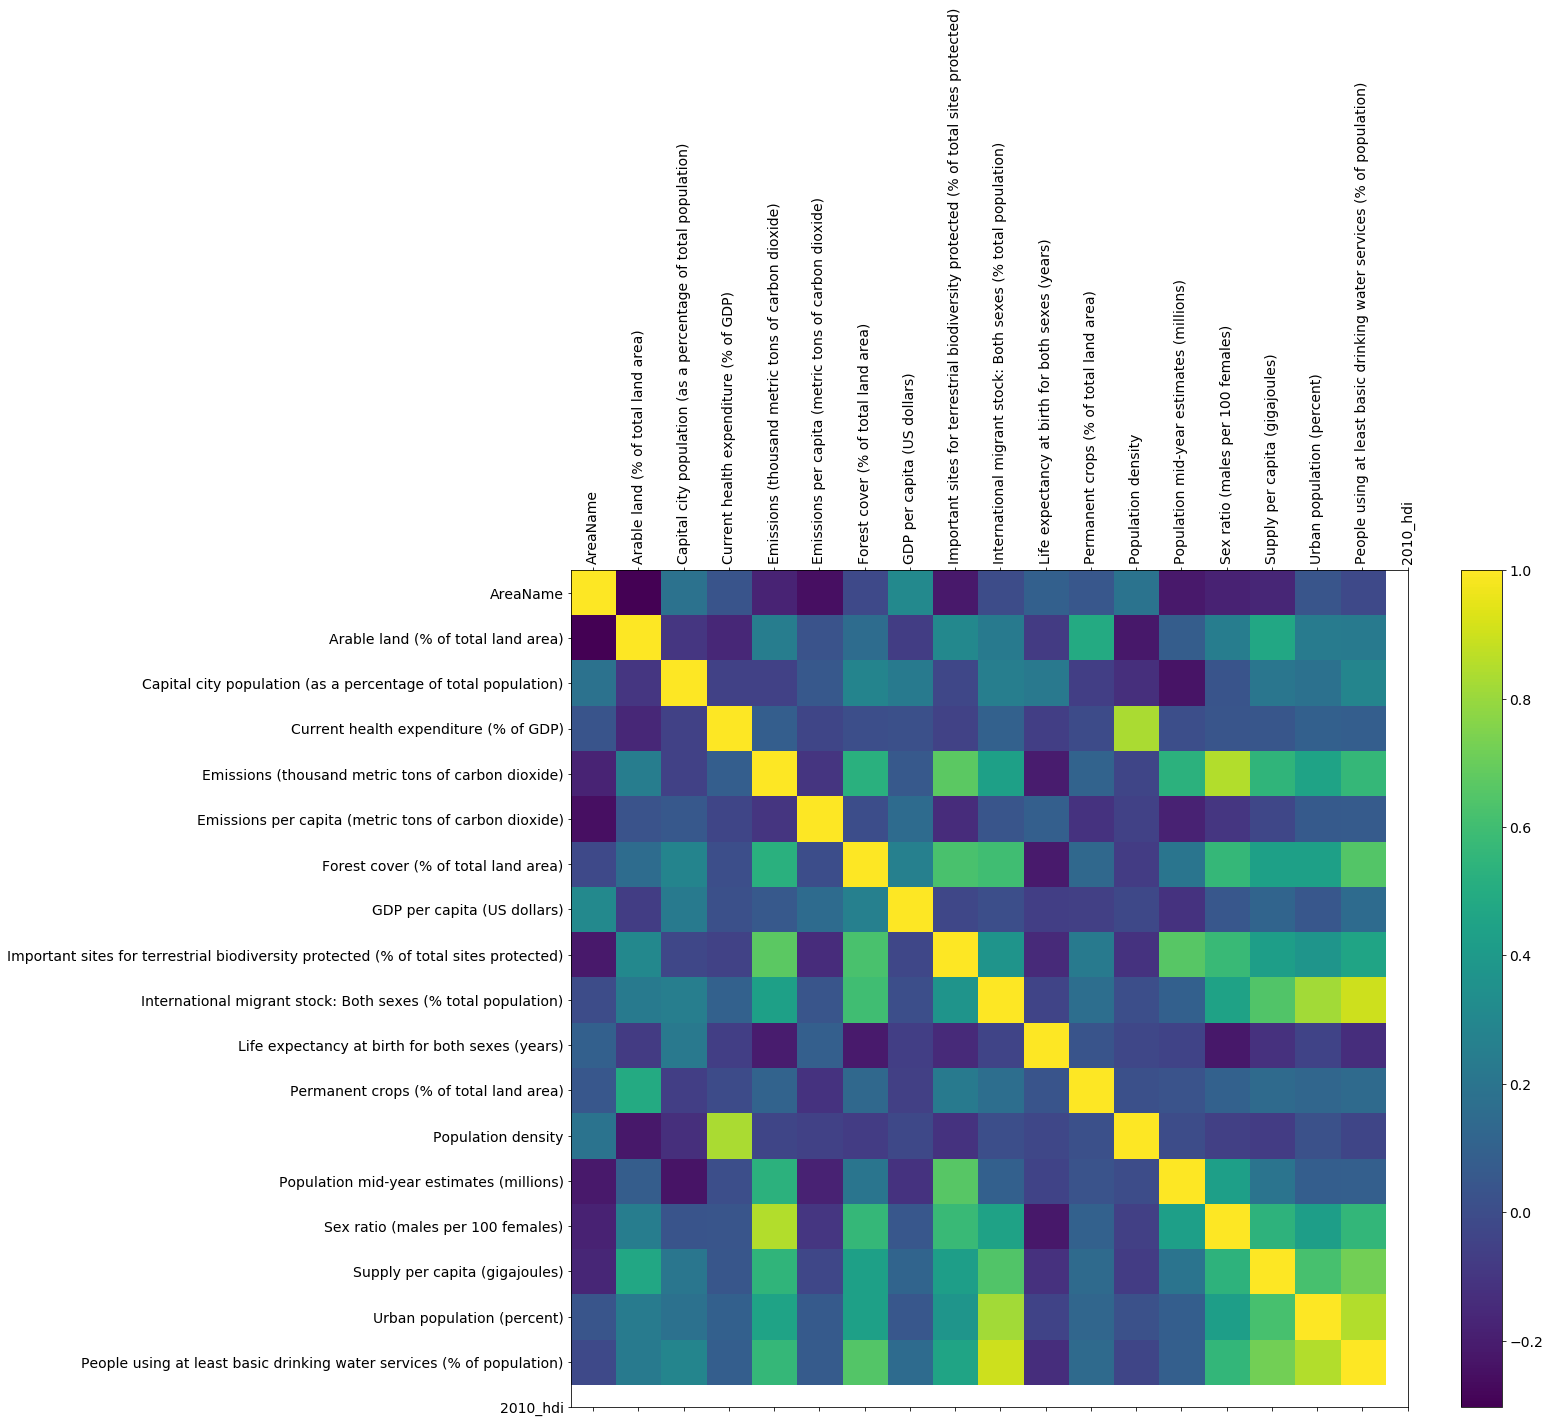

In [80]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_2010.corr(), fignum=f.number)
plt.xticks(range(df_2010.shape[1]), df_2010.columns, fontsize=14, rotation=90)
plt.yticks(range(df_2010.shape[1]), df_2010.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14);

## EDA, 2015

In [30]:
df_2015.describe()

Arable land (% of total land area)  \
count                          160.000000   
mean                            14.846250   
std                             13.678321   
min                              0.100000   
25%                              3.900000   
50%                             11.100000   
75%                             21.900000   
max                             59.600000   

       Capital city population (as a percentage of total population)  \
count                                         126.000000               
mean                                           17.666667               
std                                            14.246622               
min                                             0.500000               
25%                                             8.225000               
50%                                            15.250000               
75%                                            22.675000               
max                                           100.000000               

       Current health expenditure (% of GDP)  \
count                             157.000000   
mean                                6.704798   
std                                 2.848764   
min                                 2.214167   
25%                                 4.881267   
50%                                 6.185200   
75%                                 8.350133   
max                                21.566533   

       Emissions (thousand metric tons of carbon dioxide)  \
count                                       1.620000e+02    
mean                                        1.633905e+05    
std                                         8.433409e+05    
min                                         4.400000e+01    
25%                                         2.454500e+03    
50%                                         1.282500e+04    
75%                                         6.432600e+04    
max                                         1.029193e+07    

       Emissions per capita (metric tons of carbon dioxide)  \
count                                         162.000000      
mean                                            4.711728      
std                                             6.533719      
min                                             0.000000      
25%                                             0.725000      
50%                                             2.650000      
75%                                             5.900000      
max                                            49.700000      

       Forest cover (% of total land area)  GDP per capita (US dollars)  \
count                           160.000000                   162.000000   
mean                             30.902500                 14168.860082   
std                              23.339253                 21853.180350   
min                               0.000000                   281.000000   
25%                              11.000000                  1863.083333   
50%                              31.000000                  5322.833333   
75%                              45.550000                 15166.666667   
max                              98.300000                166203.333333   

       Important sites for terrestrial biodiversity protected (% of total sites protected)  \
count                                         159.000000                                     
mean                                           44.874843                                     
std                                            26.954740                                     
min                                             0.000000                                     
25%                                            23.245000                                     
50%                                            40.850000                                     
75%                                            71.185000           

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2abdd198>,
      dtype=object)

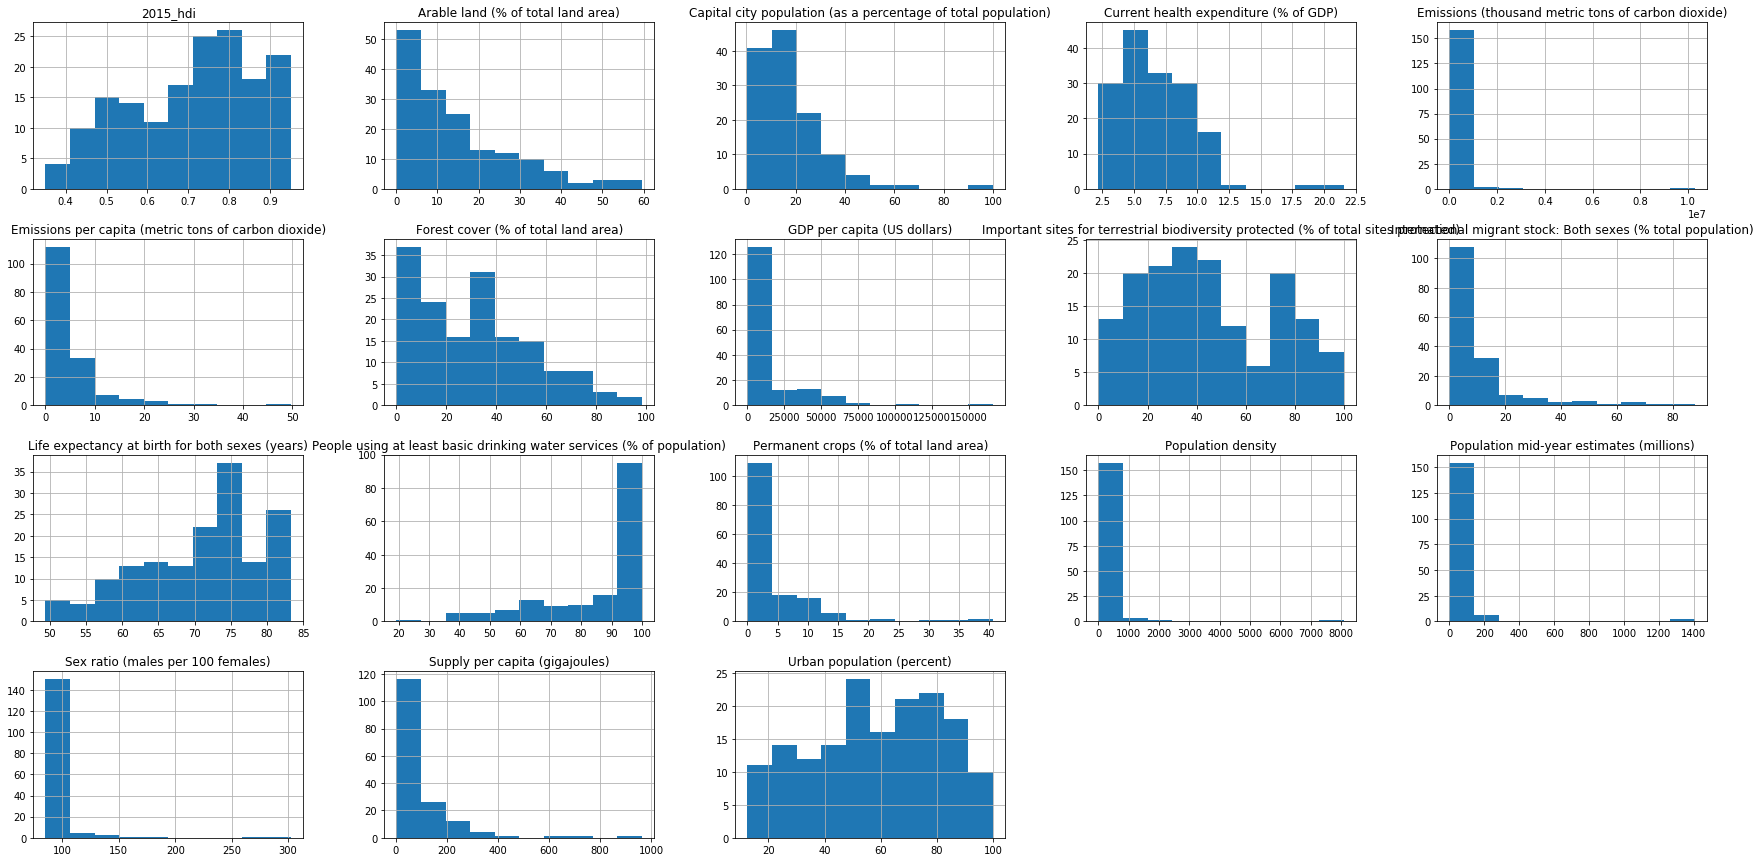

In [31]:
df_2015.hist(figsize=(30, 15), layout = (4,5))

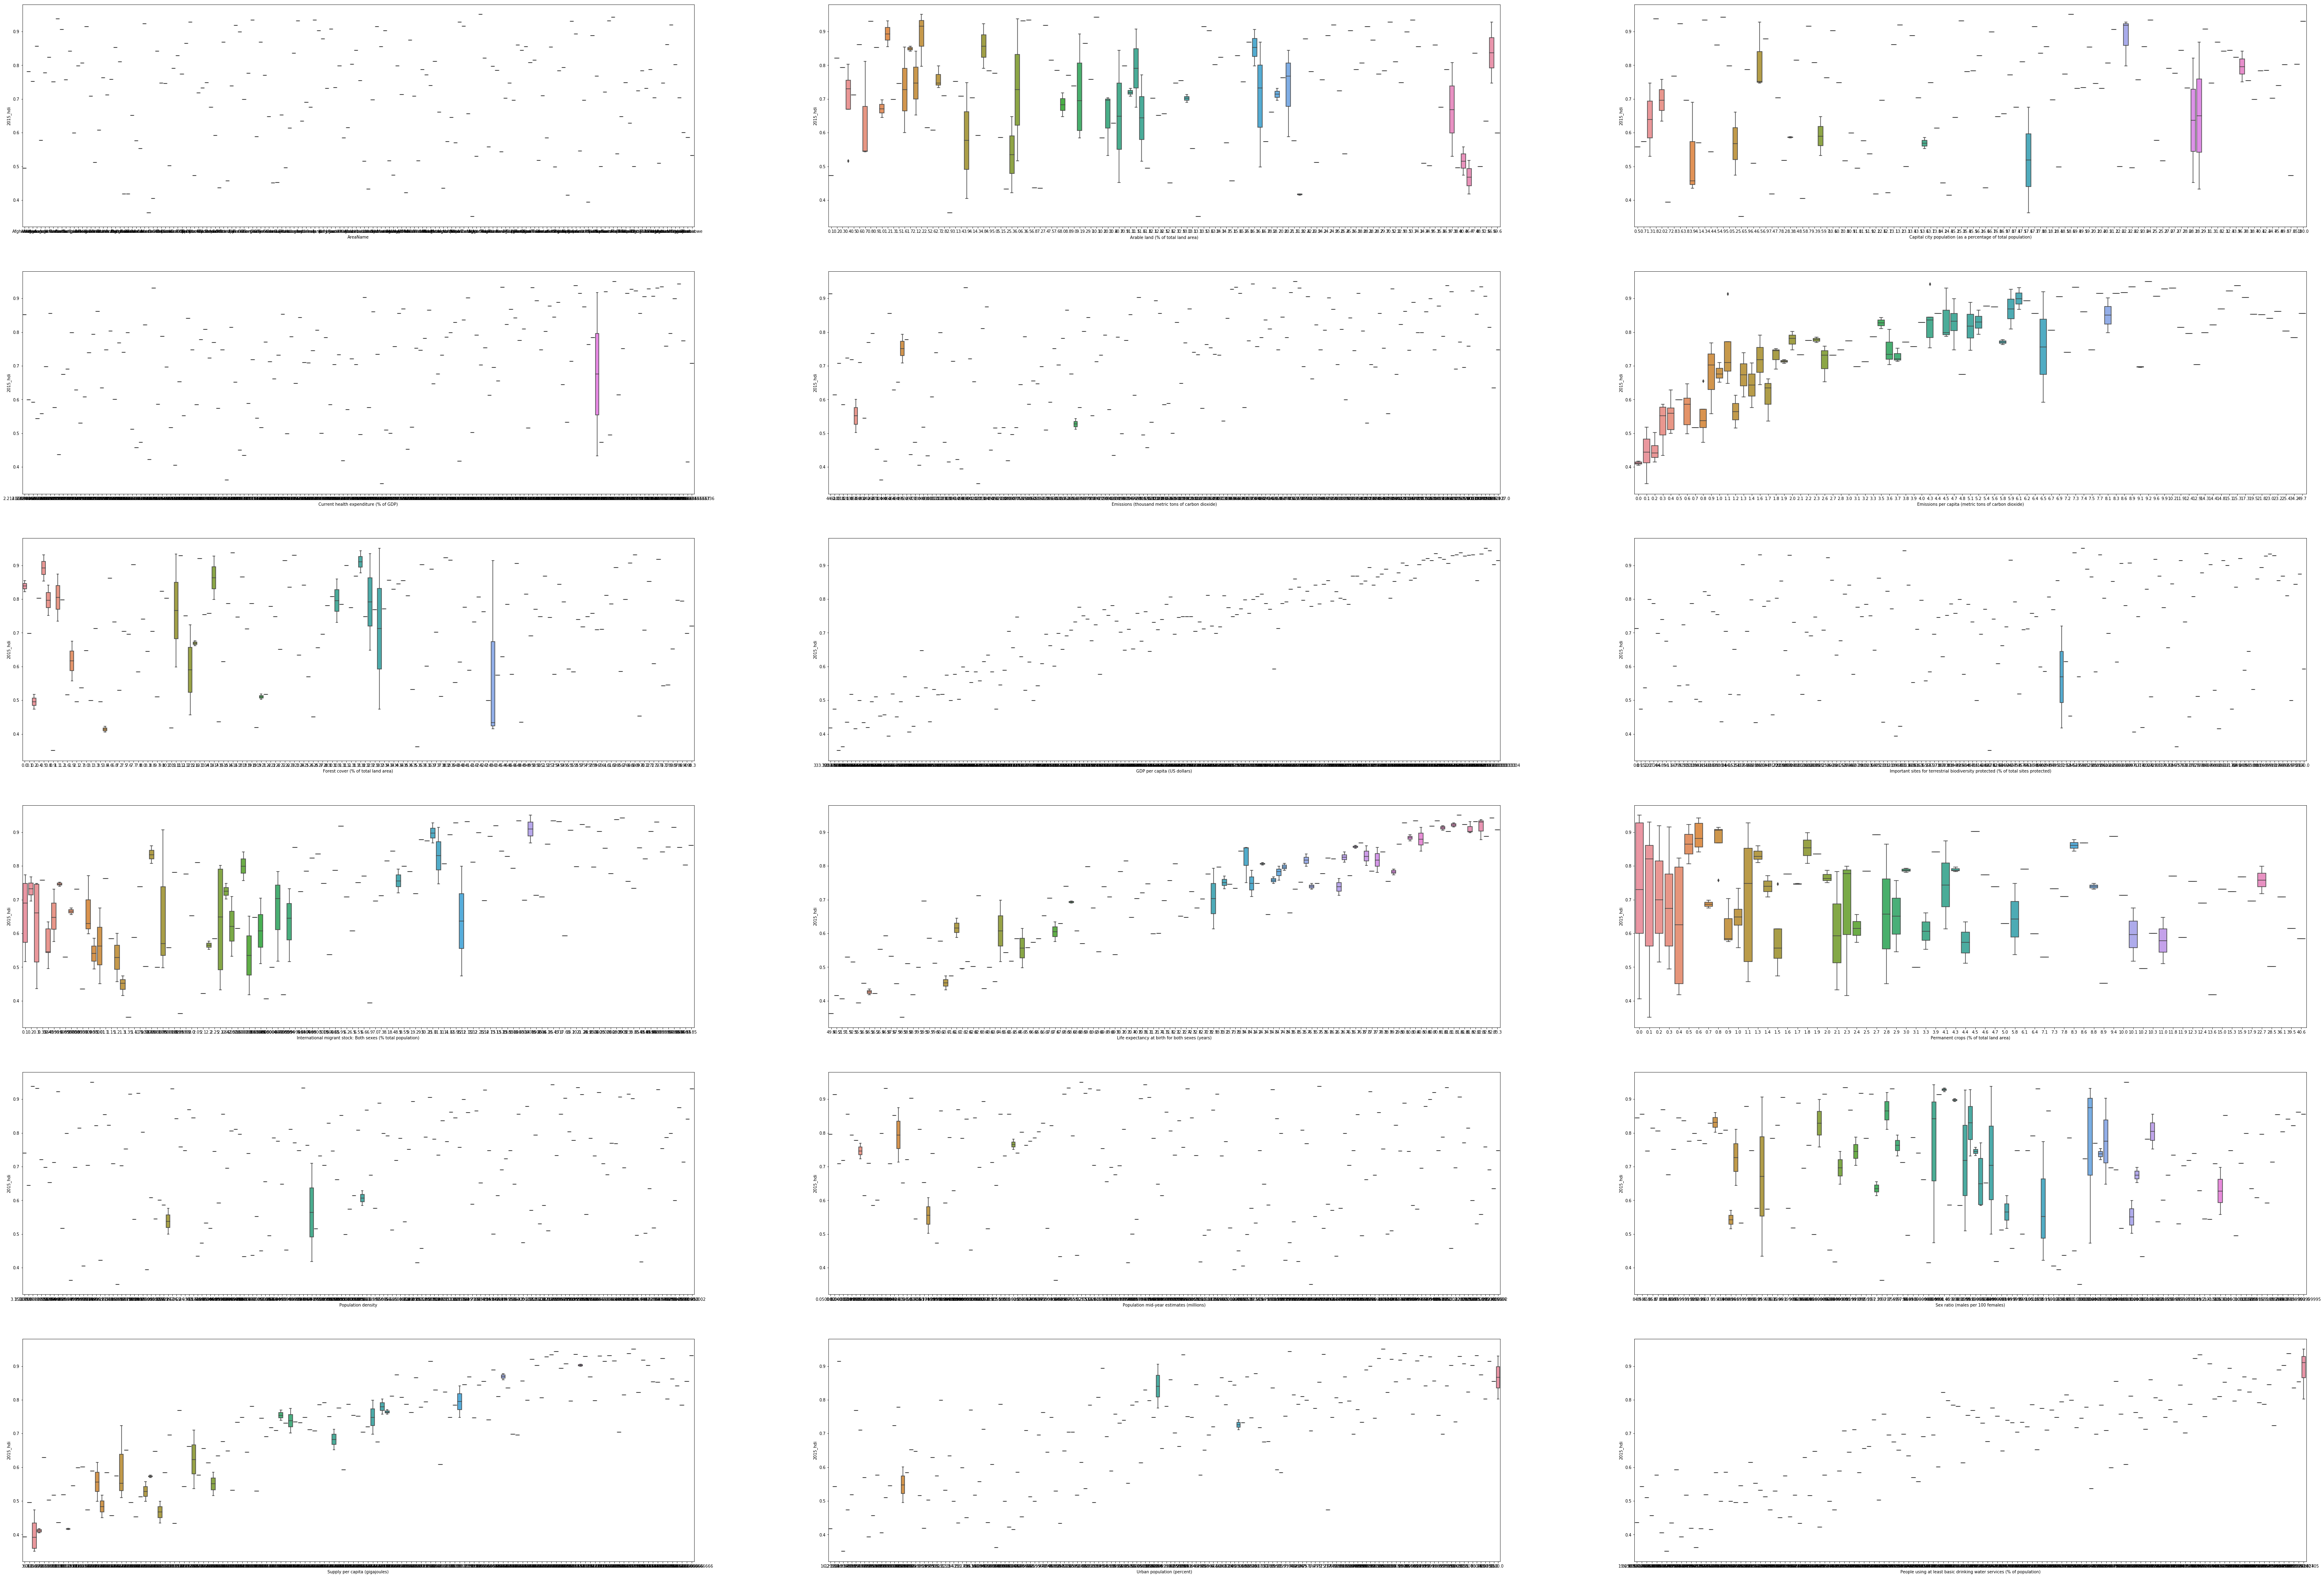

In [32]:
fig, ax = plt.subplots(6, 3, figsize=(100, 70))
for var, subplot in zip(list(df_2015.columns), ax.flatten()):
    sns.boxplot(x=var, y='2015_hdi', data=df_2015, ax=subplot)

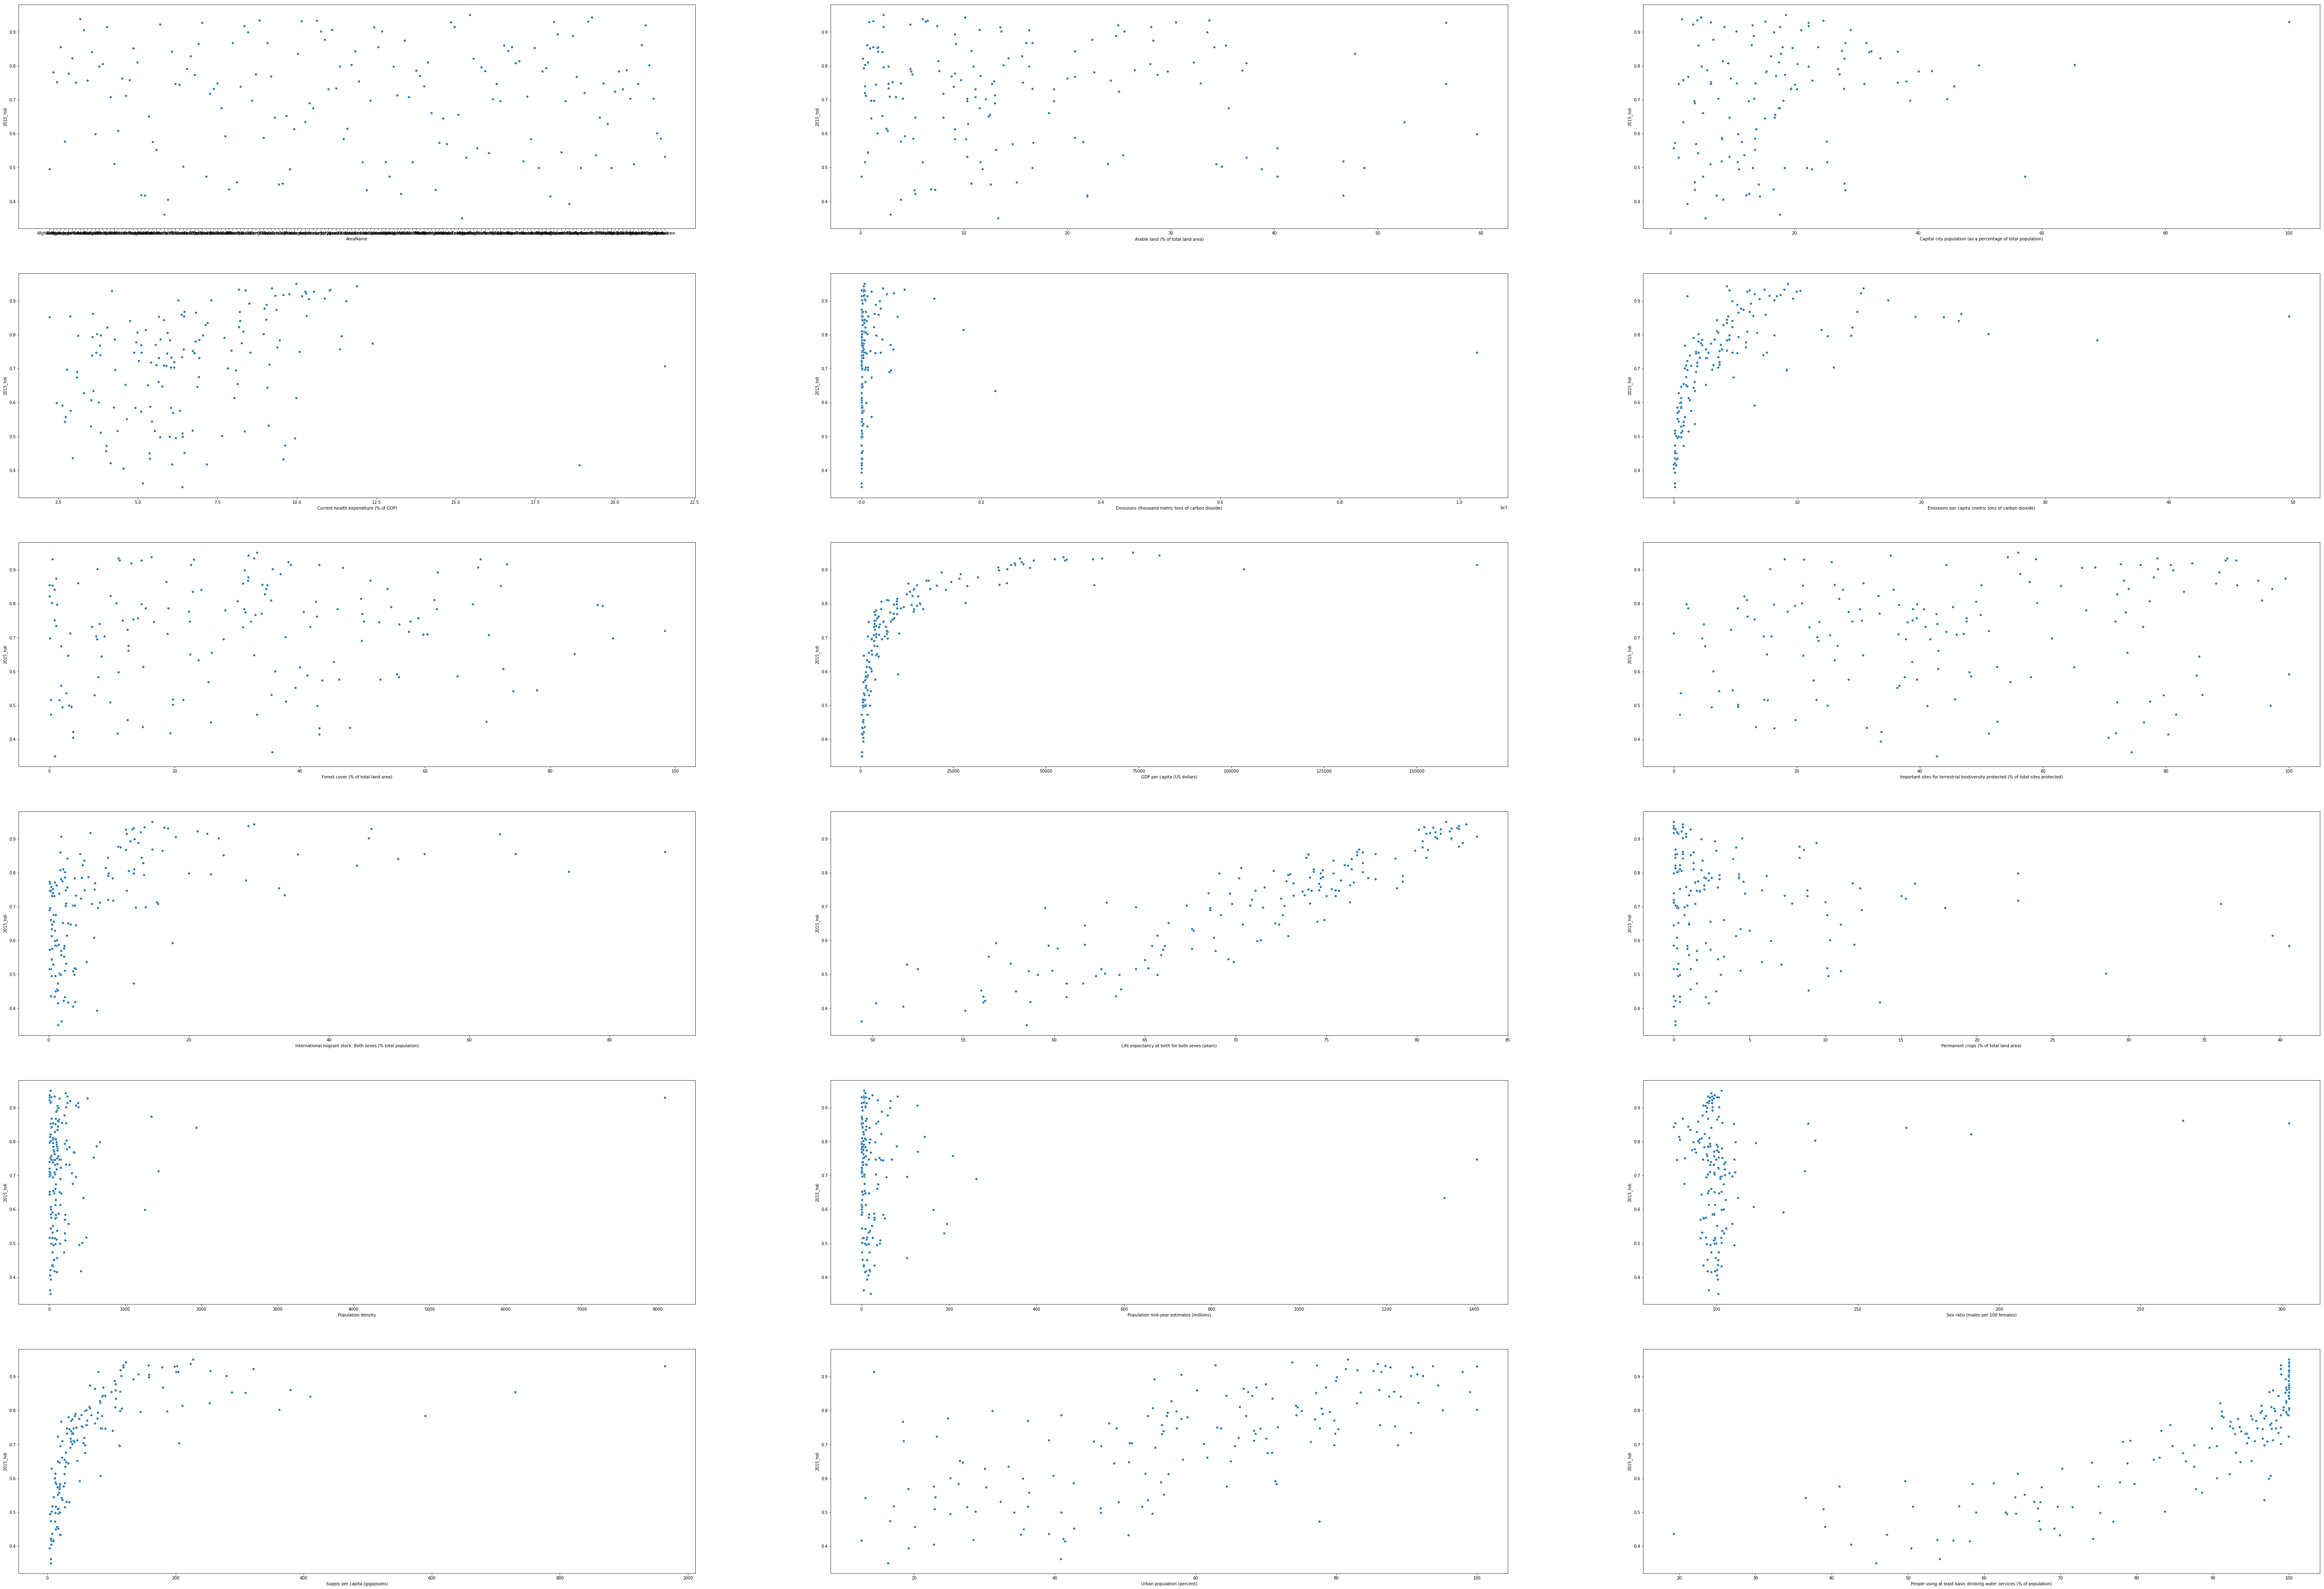

In [33]:
fig, ax = plt.subplots(6, 3, figsize=(100, 70))
for var, subplot in zip(list(df_2005.columns), ax.flatten()):
    sns.scatterplot(x=var, y='2015_hdi', data=df_2015, ax=subplot)

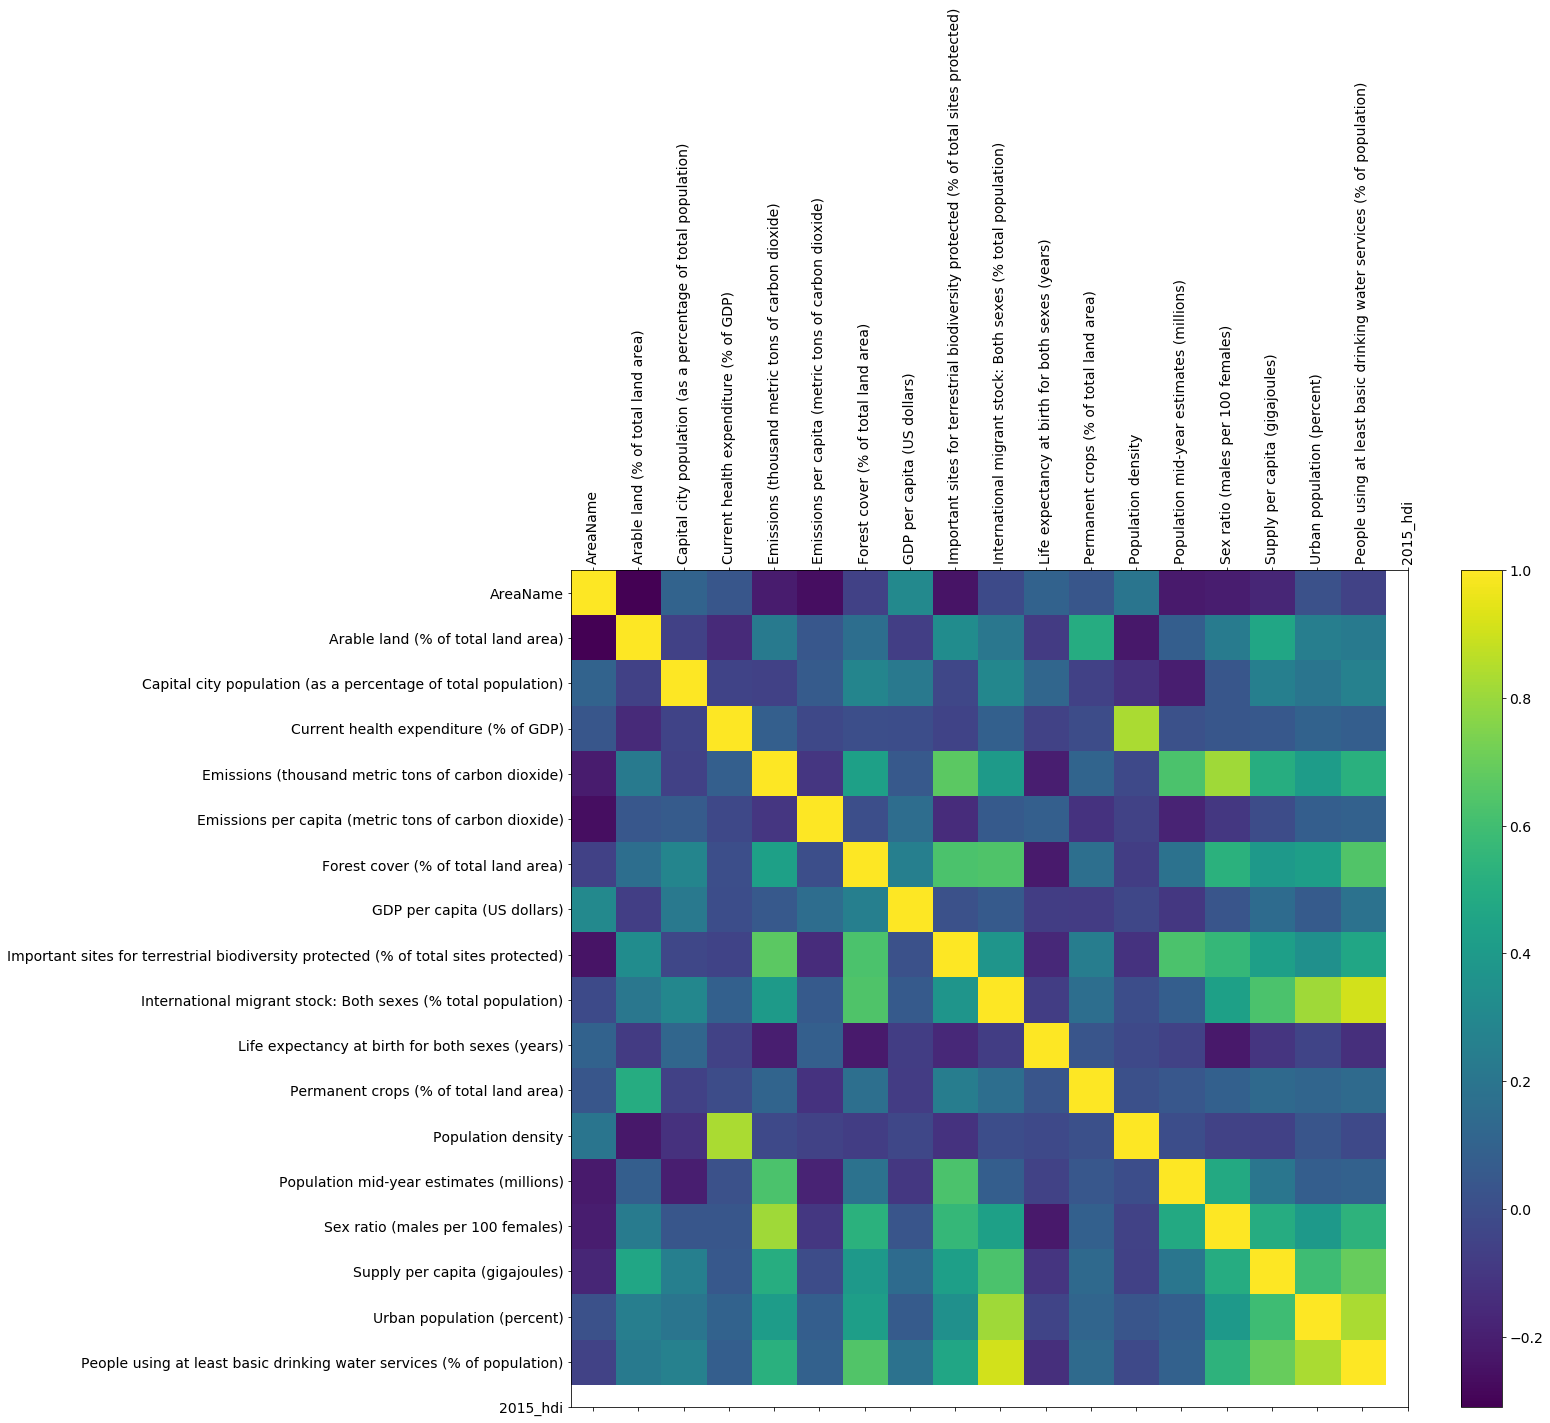

In [81]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_2015.corr(), fignum=f.number)
plt.xticks(range(df_2015.shape[1]), df_2015.columns, fontsize=14, rotation=90)
plt.yticks(range(df_2015.shape[1]), df_2015.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14);

## Random Forest, 2005

In [83]:
rf_df_2005 = df_2005.drop('AreaName', axis =1)
rf_df_2005.apply(lambda x: x.fillna(x.mean(), inplace = True),axis=0)
classifyer_column(rf_df_2005)
# Labels are the values we want to predict
labels_2005 = np.array(rf_df_2005['2005_hdi'])
# Remove the labels from the features
# axis 1 refers to the columns
features_2005 = rf_df_2005.drop('2005_hdi', axis = 1)
scaled_features = StandardScaler().fit_transform(features_2005.values)
features_2005 = pd.DataFrame(scaled_features, index=features_2005.index, columns=features_2005.columns)
# Saving feature names for later use
feature_list_2005 = list(features_2005.columns)
# Convert to numpy array
features_2005_array = np.array(features_2005)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [102]:
x_train_2005, x_test_2005, y_train_2005, y_test_2005 = train_test_split(features_2005_array, labels_2005, test_size = 0.25, random_state = 42)
print('Training Features Shape:', x_train_2005.shape)
print('Training Labels Shape:', y_train_2005.shape)
print('Testing Features Shape:', x_test_2005.shape)
print('Testing Labels Shape:', y_test_2005.shape)

Training Features Shape: (121, 17)
Training Labels Shape: (121,)
Testing Features Shape: (41, 17)
Testing Labels Shape: (41,)


In [103]:
model_2005 = RandomForestClassifier(criterion = 'entropy', n_estimators = 1000, max_depth = 10)
model_2005.fit(x_train_2005, y_train_2005)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

                 precision    recall  f1-score   support

      Developed       1.00      1.00      1.00         8
     Developing       0.95      0.90      0.92        20
Under Developed       0.86      0.92      0.89        13

      micro avg       0.93      0.93      0.93        41
      macro avg       0.93      0.94      0.94        41
   weighted avg       0.93      0.93      0.93        41

Confusion matrix, without normalization
[[ 8  0  0]
 [ 0 18  2]
 [ 0  1 12]]


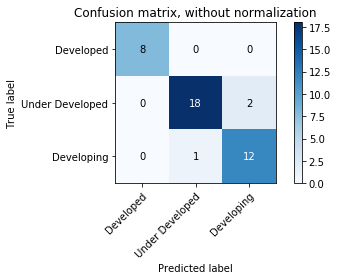

In [104]:
y_pred_2005 = model_2005.predict(x_test_2005)
print(classification_report(y_test_2005, y_pred_2005))
plot_confusion_matrix(y_test_2005, y_pred_2005, classes = set(labels_2005))

## Random Forest, 2010

In [105]:
rf_df_2010 = df_2010.drop('AreaName', axis =1)
rf_df_2010.apply(lambda x: x.fillna(x.mean(), inplace = True),axis=0)
classifyer_column(rf_df_2010)
# Labels are the values we want to predict
labels_2010 = np.array(rf_df_2010['2010_hdi'])
# Remove the labels from the features
# axis 1 refers to the columns
features_2010 = rf_df_2010.drop('2010_hdi', axis = 1)
scaled_features = StandardScaler().fit_transform(features_2010.values)
features_2010 = pd.DataFrame(scaled_features, index=features_2010.index, columns=features_2010.columns)
# Saving feature names for later use
feature_list_2010 = list(features_2010.columns)
# Convert to numpy array
features_2010_array = np.array(features_2010)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [114]:
x_train_2010, x_test_2010, y_train_2010, y_test_2010 = train_test_split(features_2010_array, labels_2010, test_size = 0.25, random_state = 42)
print('Training Features Shape:', x_train_2010.shape)
print('Training Labels Shape:', y_train_2010.shape)
print('Testing Features Shape:', x_test_2010.shape)
print('Testing Labels Shape:', y_test_2010.shape)

Training Features Shape: (121, 17)
Training Labels Shape: (121,)
Testing Features Shape: (41, 17)
Testing Labels Shape: (41,)


In [137]:
model_2010 = RandomForestClassifier(criterion = 'gini', n_estimators = 100)
model_2010.fit(x_train_2010, y_train_2010)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

                 precision    recall  f1-score   support

      Developed       1.00      1.00      1.00         8
     Developing       0.95      0.86      0.90        22
Under Developed       0.77      0.91      0.83        11

      micro avg       0.90      0.90      0.90        41
      macro avg       0.91      0.92      0.91        41
   weighted avg       0.91      0.90      0.90        41

Confusion matrix, without normalization
[[ 8  0  0]
 [ 0 19  3]
 [ 0  1 10]]


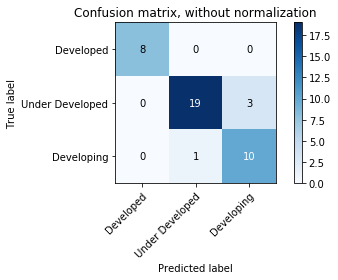

In [140]:
y_pred_2010 = model_2010.predict(x_test_2010)
print(classification_report(y_test_2010, y_pred_2010))
plot_confusion_matrix(y_test_2010, y_pred_2010, classes = set(labels_2010))

## Random Forest, 2015

In [109]:
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')


import os
from sklearn.tree import export_graphviz
import six
import pydot
from sklearn import tree
dotfile = six.StringIO()
i_tree = 0
for tree_in_forest in estimator.estimators_:
    export_graphviz(tree_in_forest,out_file='tree.dot',
    feature_names=col,
    filled=True,
    rounded=True)
    (graph,) = pydot.graph_from_dot_file('tree.dot')
    name = 'tree' + str(i_tree)
    graph.write_png(name+  '.png')
    os.system('dot -Tpng tree.dot -o tree.png')
    i_tree +=1

NameError: name 'iris' is not defined

In [110]:
rf_df_2015 = df_2015.drop('AreaName', axis =1)
rf_df_2015.apply(lambda x: x.fillna(x.mean(), inplace = True),axis=0)
classifyer_column(rf_df_2015)
# Labels are the values we want to predict
labels_2015 = np.array(rf_df_2015['2015_hdi'])
# Remove the labels from the features
# axis 1 refers to the columns
features_2015 = rf_df_2015.drop('2015_hdi', axis = 1)
scaled_features = StandardScaler().fit_transform(features_2015.values)
features_2015 = pd.DataFrame(scaled_features, index=features_2015.index, columns=features_2015.columns)
# Saving feature names for later use
feature_list_2015 = list(features_2015.columns)
# Convert to numpy array
features_2015_array = np.array(features_2015)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [111]:
x_train_2015, x_test_2015, y_train_2015, y_test_2015 = train_test_split(features_2015_array, labels_2015, test_size = 0.25, random_state = 42)
print('Training Features Shape:', x_train_2015.shape)
print('Training Labels Shape:', y_train_2015.shape)
print('Testing Features Shape:', x_test_2015.shape)
print('Testing Labels Shape:', y_test_2015.shape)

Training Features Shape: (121, 17)
Training Labels Shape: (121,)
Testing Features Shape: (41, 17)
Testing Labels Shape: (41,)


In [112]:
model_2015 = RandomForestClassifier(n_estimators = 100)
model_2015.fit(x_train_2015, y_train_2015)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

                 precision    recall  f1-score   support

      Developed       0.89      1.00      0.94         8
     Developing       0.91      0.91      0.91        23
Under Developed       0.89      0.80      0.84        10

      micro avg       0.90      0.90      0.90        41
      macro avg       0.90      0.90      0.90        41
   weighted avg       0.90      0.90      0.90        41

Confusion matrix, without normalization
[[ 8  0  0]
 [ 1 21  1]
 [ 0  2  8]]


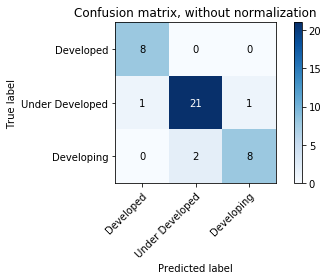

In [113]:
y_pred_2015 = model_2015.predict(x_test_2015)
print(classification_report(y_test_2015, y_pred_2015))
plot_confusion_matrix(y_test_2015, y_pred_2015, classes = set(labels_2015))

## KNN, 2005

In [117]:
knn_2005 = KNeighborsClassifier(n_neighbors=3)
knn_2005.fit(x_train_2005, y_train_2005) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [118]:
knn_2005.predict(x_test_2005)

array(['Developing', 'Under Developed', 'Under Developed', 'Developed',
       'Under Developed', 'Developed', 'Under Developed', 'Developed',
       'Developing', 'Under Developed', 'Developing', 'Developing',
       'Developed', 'Developed', 'Under Developed', 'Under Developed',
       'Developing', 'Developing', 'Developing', 'Developing',
       'Developed', 'Developing', 'Developing', 'Developed',
       'Under Developed', 'Under Developed', 'Developing',
       'Under Developed', 'Developed', 'Developed', 'Developing',
       'Under Developed', 'Under Developed', 'Developing', 'Developing',
       'Under Developed', 'Developing', 'Developing', 'Developing',
       'Developing', 'Developing'], dtype=object)

In [119]:
knn_2005.score(x_test_2005,y_test_2005)

0.8292682926829268

In [120]:
#create a new KNN model
knn_cv_2005 = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores_2005 = cross_val_score(knn_cv_2005, x_train_2005, y_train_2005, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores_2005)
print('cv_scores mean:{}'.format(np.mean(cv_scores_2005)))

[0.84       0.76       0.84       1.         0.86956522]
cv_scores mean:0.8619130434782608


In [121]:
#create new a knn model
knn2_2005 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid_2005 = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv_2005 = GridSearchCV(knn2_2005, param_grid_2005, cv=5)
#fit model to data
print(knn_gscv_2005.fit(x_train_2005, y_train_2005))

print('\n')
#check top performing n_neighbors value
print(knn_gscv_2005.best_params_)
#check mean score for the top performing value of n_neighbors
print(knn_gscv_2005.best_score_)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


{'n_neighbors': 2}
0.8677685950413223


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


                 precision    recall  f1-score   support

      Developed       0.80      1.00      0.89         8
     Developing       0.79      0.75      0.77        20
Under Developed       0.75      0.69      0.72        13

      micro avg       0.78      0.78      0.78        41
      macro avg       0.78      0.81      0.79        41
   weighted avg       0.78      0.78      0.78        41

Confusion matrix, without normalization
[[ 8  0  0]
 [ 2 15  3]
 [ 0  4  9]]


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


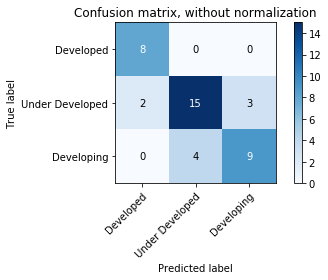

In [122]:
temp_2005 = knn_gscv_2005.fit(x_train_2005, y_train_2005)
knn_gs_pred_2005 = temp_2005.predict(x_test_2005)
print(classification_report(y_test_2005, knn_gs_pred_2005)) 
plot_confusion_matrix(y_test_2005, knn_gs_pred_2005, classes = set(labels_2005))

# KNN, 2010

In [123]:
knn_2010 = KNeighborsClassifier(n_neighbors=3)
knn_2010.fit(x_train_2010, y_train_2010) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [124]:
knn_2010.predict(x_test_2010)

array(['Developing', 'Under Developed', 'Under Developed', 'Developed',
       'Under Developed', 'Developed', 'Under Developed', 'Developed',
       'Developing', 'Under Developed', 'Developing', 'Developing',
       'Developed', 'Developed', 'Under Developed', 'Under Developed',
       'Developing', 'Under Developed', 'Developing', 'Developing',
       'Developed', 'Developing', 'Developing', 'Developed',
       'Under Developed', 'Under Developed', 'Developing', 'Developing',
       'Developed', 'Developed', 'Developing', 'Under Developed',
       'Under Developed', 'Developing', 'Developing', 'Under Developed',
       'Developing', 'Developing', 'Developing', 'Developing',
       'Developing'], dtype=object)

In [125]:
knn_2010.score(x_test_2010,y_test_2010)

0.8780487804878049

In [126]:
#create a new KNN model
knn_cv_2010 = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores_2010 = cross_val_score(knn_cv_2010, x_train_2010, y_train_2010, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores_2010)
print('cv_scores mean:{}'.format(np.mean(cv_scores_2010)))

[0.80769231 0.84       0.79166667 0.91304348 0.91304348]
cv_scores mean:0.8530891861761427


In [127]:
#create new a knn model
knn2_2010 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid_2010 = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv_2010 = GridSearchCV(knn2_2010, param_grid_2010, cv=5)
#fit model to data
print(knn_gscv_2010.fit(x_train_2010, y_train_2010))

print('\n')
#check top performing n_neighbors value
print(knn_gscv_2010.best_params_)
#check mean score for the top performing value of n_neighbors
print(knn_gscv_2010.best_score_)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


{'n_neighbors': 16}
0.859504132231405


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


                 precision    recall  f1-score   support

      Developed       0.89      1.00      0.94         8
     Developing       0.91      0.91      0.91        22
Under Developed       0.90      0.82      0.86        11

      micro avg       0.90      0.90      0.90        41
      macro avg       0.90      0.91      0.90        41
   weighted avg       0.90      0.90      0.90        41

Confusion matrix, without normalization
[[ 8  0  0]
 [ 1 20  1]
 [ 0  2  9]]


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


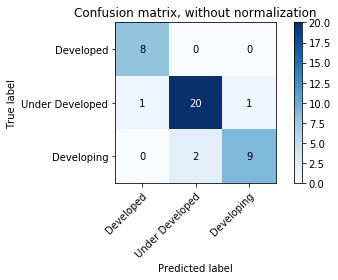

In [130]:
temp_2010 = knn_gscv_2010.fit(x_train_2010, y_train_2010)
knn_gs_pred_2010 = temp_2010.predict(x_test_2010)
print(classification_report(y_test_2010, knn_gs_pred_2010)) 
plot_confusion_matrix(y_test_2010, knn_gs_pred_2010, classes = set(labels_2010))

## KNN, 2015

In [131]:
knn_2015 = KNeighborsClassifier(n_neighbors=3)
knn_2015.fit(x_train_2015, y_train_2015) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [132]:
knn_2015.predict(x_test_2015)

array(['Developing', 'Under Developed', 'Under Developed', 'Developed',
       'Developing', 'Developed', 'Under Developed', 'Developed',
       'Developing', 'Under Developed', 'Developing', 'Developing',
       'Developed', 'Developed', 'Under Developed', 'Developing',
       'Developing', 'Developing', 'Under Developed', 'Developing',
       'Developed', 'Developing', 'Developing', 'Developed',
       'Under Developed', 'Under Developed', 'Developing', 'Developing',
       'Developed', 'Developed', 'Developing', 'Developing',
       'Under Developed', 'Developing', 'Developing', 'Under Developed',
       'Developing', 'Developing', 'Developing', 'Developing',
       'Developing'], dtype=object)

In [133]:
knn_2015.score(x_test_2015,y_test_2015)

0.8780487804878049

In [134]:
#create a new KNN model
knn_cv_2015 = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores_2015 = cross_val_score(knn_cv_2015, x_train_2015, y_train_2015, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores_2015)
print('cv_scores mean:{}'.format(np.mean(cv_scores_2015)))

[0.80769231 0.8        0.79166667 0.7826087  0.86956522]
cv_scores mean:0.8103065774804905


In [135]:
#create new a knn model
knn2_2015 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid_2015 = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv_2015 = GridSearchCV(knn2_2015, param_grid_2015, cv=5)
#fit model to data
print(knn_gscv_2015.fit(x_train_2005, y_train_2005))
print('\n')
#check top performing n_neighbors value
print(knn_gscv_2015.best_params_)
#check mean score for the top performing value of n_neighbors
print(knn_gscv_2015.best_score_)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


{'n_neighbors': 2}
0.8677685950413223


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


                 precision    recall  f1-score   support

      Developed       0.89      1.00      0.94         8
     Developing       0.95      0.91      0.93        23
Under Developed       0.90      0.90      0.90        10

      micro avg       0.93      0.93      0.93        41
      macro avg       0.91      0.94      0.92        41
   weighted avg       0.93      0.93      0.93        41

Confusion matrix, without normalization
[[ 8  0  0]
 [ 1 21  1]
 [ 0  1  9]]


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


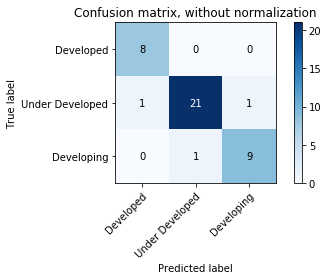

In [136]:
temp_2015 = knn_gscv_2015.fit(x_train_2015, y_train_2015)
knn_gs_pred_2015 = temp_2015.predict(x_test_2015)
print(classification_report(y_test_2015, knn_gs_pred_2015)) 
plot_confusion_matrix(y_test_2015, knn_gs_pred_2015, classes = set(labels_2015))

In [175]:
knn_2005

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

## XGBoost, 2005

In [ ]:
# fit model no training data
lasttest = XGBClassifier()
lasttest.fit(x_train_2005, y_train_2005)

In [66]:
abc = AdaBoostClassifier(n_estimators=1000, learning_rate=.5)
# Train Adaboost Classifer
model = abc.fit(x_train_2005, y_train_2005)

#Predict the response for test dataset
y_pred = model.predict(x_test_2005)
print("Accuracy:",metrics.accuracy_score(y_test_2005, y_pred))

Accuracy: 0.7272727272727273
